# <center>MICAS901 - Introduction to Optimization </center>#
# <center> MICAS901 - Introduction to Optimization: Final Project</center>#
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
# Email: amet1900@gmail.com #
# Github: https://github.com/Panongbene #

In [1]:
import random
import numpy as np
import pandas as pd
from random import shuffle
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
%matplotlib inline

## IMPORTING DATA 

In [3]:
#load the data
# https://publicifsv.sund.ku.dk/~tag/Teaching/share/data/Bodyfat.html # download data
body_fat_data=pd.read_csv("DATA/Bodyfat.csv")

In [4]:
#to see the size of the datas
print("Body Fat Dataset        = ",body_fat_data.shape)

Body Fat Dataset        =  (252, 15)


# PREPROCESSING

In [5]:
# see the head of data
body_fat_data[0:10]

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [6]:
body_fat_data.dtypes

Density    float64
bodyfat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

#### We can see here that the type of the age column is an integer, so we convert it to float

In [7]:
body_fat_data['Age'] = body_fat_data['Age'].astype(float)

In [8]:
#to see the statistique of the testing data
print(body_fat_data.describe(include="all"))

          Density     bodyfat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.7830

#### In here we can see that we have not a missing data
#### The task to be accomplished in this work will be to predict the column bodyfat

In [9]:
# separarte label and feature column
data_X = body_fat_data.drop(['bodyfat'], axis=1)
data_Y = body_fat_data["bodyfat"]

#normalization
x = data_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_X = pd.DataFrame(x_scaled)

# Required function

#### I USE THIS FUNCTION TO DETERMINATE THE EXECUTION TIME

In [10]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

#### BUILD K FOLD

In [11]:
def divide_data_set(list_index, number_k_fold, randomise_boolean):
    """This function takes as input a list of integers and an integer k and a boolean variable randomise_boolean
    """
    tampon = list_index
    #if(randomise_boolean):
    #    shuffle(tampon)
        
    k_fold_return = dict()
    
    size_k_fold = len(list_index)//number_k_fold

    for i in range(number_k_fold):
        k_fold_return[i] = list_index[i*size_k_fold:(i+1)*size_k_fold]
        
    k_fold_return[i] = list_index[i*size_k_fold:len(list_index)]
    
    return k_fold_return

#### PLOT HISTOGRAM

In [12]:
def plot_hist(k_value, accuracy, title, x_label, y_label):
    """Uses this fonction for to plot histogram"""
    
    plt.figure(figsize=(10,10))
    
    unit = accuracy
 
    plot = plt.bar(k_value, accuracy)
 
    for value in plot:
        height = value.get_height()
        plt.text(value.get_x() + value.get_width()/2., height,'error = %f' % height, ha='center', va='bottom')
 
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(title+'.png')
    # show the graph
    plt.show()
    

#### PLOT FIGURE

In [13]:
def plot_figure(values_list, abcis_value, label, title, x_label, y_label):
    """This function build the graphe of list values"""
    
    plt.figure(figsize=(10,10))
    plt.plot(abcis_value,values_list, label=label)
    plt.grid()

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    #plt.savefig('trainingError.png')

    plt.show()

# Part 1: deep linear network

#### FORWARD FUNCTION

In [14]:
def forward_deep(data_X, W_1, W_2):
    """forward function"""
    
    z_1 = np.dot(data_X.values, W_1)
    
    return np.ravel(np.dot(z_1, W_2))

#### LOST FUNCTION

In [15]:
def loss_function_f(data_X, data_Y, W_1, W_2, lamda_1, lamda_2):
    """this function computhe the loss function of f"""
    tamp_1 = forward_deep(data_X, W_1, W_2)-data_Y
    
    loss_ = (np.linalg.norm(tamp_1)**2)/data_X.shape[0]+lamda_1*(np.linalg.norm(W_1)**2)+lamda_2*(np.linalg.norm(W_2)**2)
    
    return loss_

#### GRADIENT g_i FUNCTION

In [16]:
def gradient_loss_g_i(X_i, Y_i, W_1, W_2, lamda_1, lamda_2):
    """This function compute the gradien of g_i"""
    
    #----------------------------------------------------------
    tamp_1 = forward_deep(X_i, W_1, W_2)-Y_i
    tamp_2 = np.dot(X_i.values, W_1)
    #----------------------------------------------------------
    #tampon_1 = np.dot(tamp_1, ).reshape(W_1.shape[1],1)
    
    W_1_grad = 2*tamp_1*np.dot(W_2, X_i.values).T+2*lamda_1*W_1
    W_2_grad = 2*tamp_1*tamp_2.T+2*lamda_2*W_2
    
    return W_1_grad, W_2_grad

#### GRADIENT LOSS FUNCTION F

In [17]:
def gradient_loss_f(data_X, data_Y, W_1, W_2, lamda_1, lamda_2):
    """This function compute the gradien for dataset"""
    
    tamp_1 = (forward_deep(data_X, W_1, W_2)-data_Y)
    tamp_1 = tamp_1.values.reshape(-1,1)
    
    tampon_1 = np.dot( data_X.T.values, tamp_1).reshape(W_1.shape[0],1)    
    
    tamp_2 = np.dot(data_X.values, W_1)
    
    W_1_grad = (2/data_X.shape[0])*np.dot(tampon_1, W_2.T)+2*lamda_1*W_1
    W_2_grad = (2/data_X.shape[0])*np.dot(tamp_2.T ,tamp_1)+2*lamda_2*W_2
    
    return W_1_grad, W_2_grad

## a) BP with constant step-size:

#### INITIALIZATION

In [45]:
# initialization
nb_neuronal_first_layer = 5

lamda_1 = 0.00002
lamda_2 = 0.00005
step_size = 0.12

W_1 = 0.1*np.random.rand(data_X.shape[1],nb_neuronal_first_layer, )
W_2 = 0.1*np.random.rand(nb_neuronal_first_layer, 1)

#### TRAINING ALGORITHM

In [46]:
def traning_BP(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, nb_iteration):
    """uses this algorithm for training weights"""
    
    # initialize weight
    W_1 = 0.01*np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
    W_2 = 0.01*np.random.rand(nb_neuronal_first_layer,1)#0.1*np.ones((1, nb_output_first_layer))
    training_error = list()
    #print(W_2)
    for i in range(nb_iteration):
        
        W_1_grad, W_2_grad = gradient_loss_f(data_X, data_Y, W_1, W_2, lamda_1, lamda_2)
        
        #print(np.linalg.norm(W_1_grad))
        loss_ = loss_function_f(data_X, data_Y, W_1, W_2, lamda_1, lamda_2)
        
        #print(loss_)
        training_error.append(loss_)
        
        W_1 = W_1 - step_size*W_1_grad
        W_2 = W_2 - step_size*W_2_grad

    return W_1, W_2, training_error

In [49]:
l1, l2, training_error = traning_BP(data_X, data_Y, lamda_1, lamda_2, 0.001, 25, 10000)

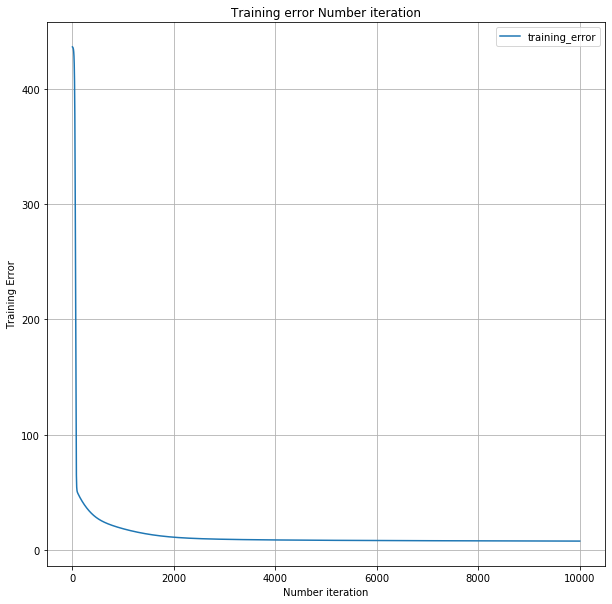

In [51]:
N = np.arange(len(training_error))
plot_figure(training_error, N, "training_error", "Training error Number iteration", 'Number iteration', 'Training Error')

### CROSS VALIDATION

In [52]:
# initialization list of parameter to test
nb_kfold = 3
nb_neurone = 10
list_parameter_lamda_1 = [0.01, 10, 0.1, 1, 0.21, 5]
list_parameter_lamda_2 = [0.01, 10, 0.1, 1, 0.21, 5]
list_parameter_step_size = [0.1, 0.02, 0.3, 0.04, 0.5, 0.6, 1]


##### Cross Validation Lamda 1

In [55]:
lamda_2 = 0.1
step_size = 0.01

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_1_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_1)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_BP(testing_X, testing_Y, list_parameter_lamda_1[i], lamda_2, step_size, nb_neurone, 100)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, list_parameter_lamda_1[i], lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_1_.append(np.mean(error_k_fold))

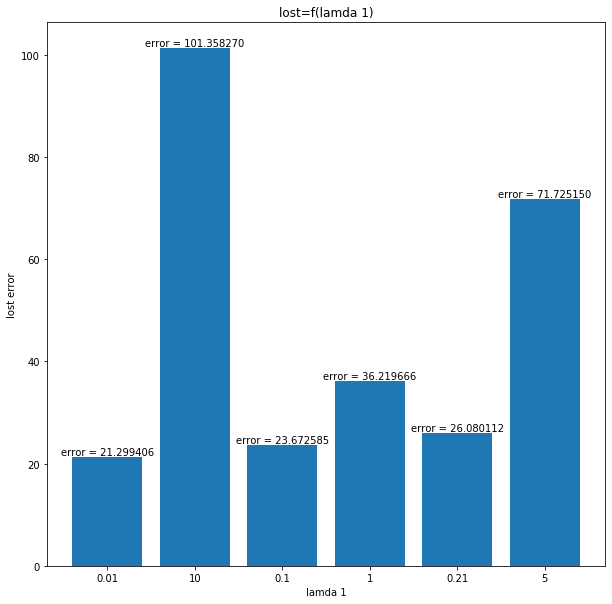

In [56]:
plot_hist(["0.01", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_1_, "lost=f(lamda 1)", "lamda 1", "lost error")

##### Cross Validation Lamda 2

In [57]:
lamda_1 = 0.1
step_size = 0.01

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_2_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_2)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_BP(testing_X, testing_Y, lamda_1, list_parameter_lamda_2[i], step_size, nb_neurone, 100)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, lamda_1, list_parameter_lamda_2[i])
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_2_.append(np.mean(error_k_fold))

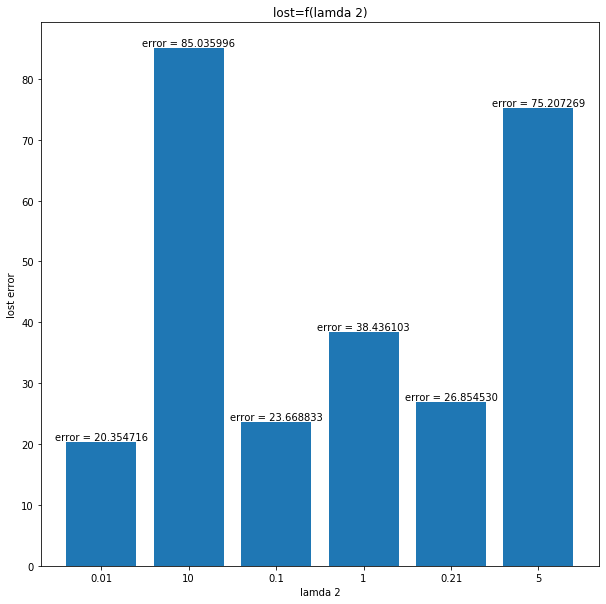

In [58]:
plot_hist(["0.01", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_2_, "lost=f(lamda 2)", "lamda 2", "lost error")

#### CROSS VALIDATION STEP SIZE

In [61]:
lamda_1 = 0.01
lamda_2 = 0.01
list_parameter_step_size = [0.001, 0.02, 0.0003, 0.004, 0.005, 0.006, 0.0001]

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)


error_cross_validation_step_size = list()
for i in range(len(list_parameter_step_size)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_BP(testing_X, testing_Y, lamda_1, lamda_2, list_parameter_step_size[i], nb_neurone, 100)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, lamda_1, lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_step_size.append(np.mean(error_k_fold))

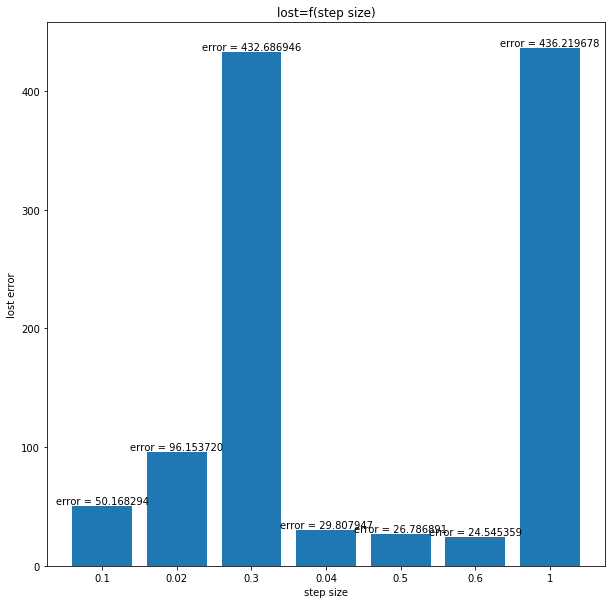

In [62]:
plot_hist(["0.1", "0.02", "0.3", "0.04", "0.5", "0.6", "1"], error_cross_validation_step_size, "lost=f(step size)", "step size", "lost error")

## b) Mini-Bath SGD

#### INITIALIZATION

In [101]:
# initialization
nb_neuronal_first_layer = 10

lamda_1 = 0.001
lamda_2 = 0.001
size_batch = 50
step_size = 0.01


W_1 = 0.1*np.random.rand(data_X.shape[1],nb_neuronal_first_layer )
W_2 = 0.1*np.random.rand(nb_neuronal_first_layer, 1)

#### TRAINING ALGORITHM

In [111]:
def traning_mini_bath_SGD(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, size_batch, nb_iteration):
    """we use this function for training the weights using mini bath sge """
    
    # initialize weight
    W_1 = 0.01*np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
    W_2 = 0.01*np.random.rand(nb_neuronal_first_layer, 1)#0.1*np.ones((1, nb_output_first_layer))
    training_error = list()
    
    batch_list = [random.randint(0,data_X.shape[0])%data_X.shape[0] for i in range(size_batch)]
    #print(W_2)
    for i in range(nb_iteration):
        
        W_1_g = 0*np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
        W_2_g = 0*np.random.rand(nb_neuronal_first_layer, 1)
        for j in batch_list:
            W_1_grad, W_2_grad = gradient_loss_g_i(pd.DataFrame(data_X.iloc[j]).T, data_Y[j], W_1, W_2, lamda_1, lamda_2)
    
            W_1_g = (W_1_g + W_1_grad)/size_batch
            W_2_g = (W_2_g + W_2_grad)/size_batch
            
        #print(np.linalg.norm(W_2_grad))
        loss_ = loss_function_f(data_X, data_Y, W_1, W_2, lamda_1, lamda_2)
        
        #print(loss_)
        training_error.append(loss_)
        
        W_1 = W_1 - step_size*W_1_g
        W_2 = W_2 - step_size*W_2_g
    #print(W_2)
    return W_1, W_2, training_error

In [112]:
l1, l2, training_error = traning_mini_bath_SGD(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, size_batch, 1000)

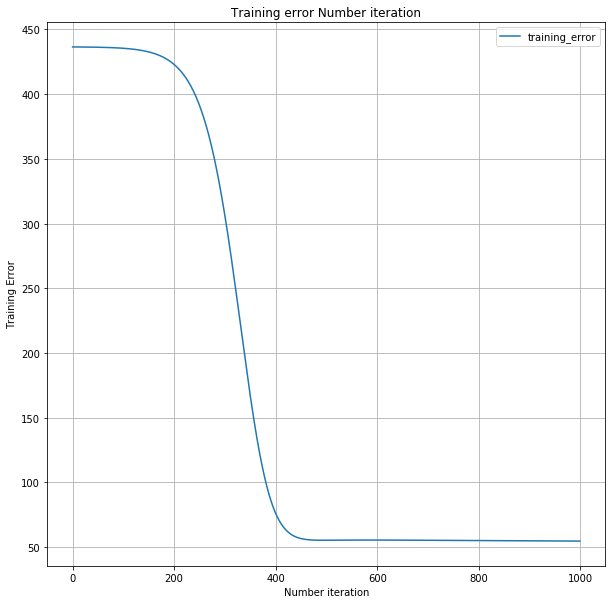

In [113]:
N = np.arange(len(training_error))
plot_figure(training_error, N, "training_error", "Training error Number iteration", 'Number iteration', 'Training Error')

#### CROSS VALIDATION

In [114]:
# initialization list of parameter to test
nb_kfold = 3
nb_neurone = 10

##### Cross Validation in fact Lamda 1

In [121]:
lamda_2 = 0.01
step_size = 0.01
size_batch = 1
list_parameter_lamda_1 = [0.001, 10, 0.1, 1, 0.21, 5]
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, False)

error_cross_validation_lamda_1_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_1)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])
        training_Y = data_Y[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])["bodyfat"]
    
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_mini_bath_SGD(training_X, training_Y, list_parameter_lamda_1[i], lamda_2, step_size, nb_neurone, size_batch, 115)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, list_parameter_lamda_1[i], lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_1_.append(np.mean(error_k_fold))

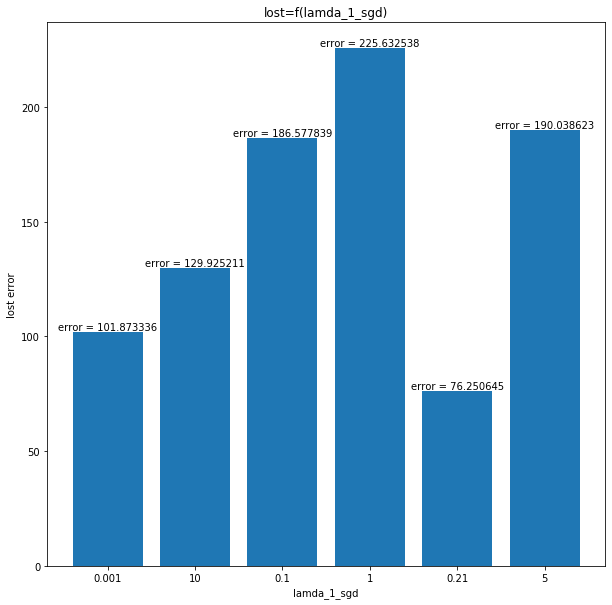

In [122]:
plot_hist(["0.001", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_1_, "lost=f(lamda_1_sgd)", "lamda_1_sgd", "lost error")

##### Cross Validation Lamda 2

In [127]:
lamda_1 = 0.01
step_size = 0.001
size_batch = 1
list_parameter_lamda_2 = [0.01, 0.4, 0.1, 1, 0.21, 0.05]

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, False)

error_cross_validation_lamda_2_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_2)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])
        training_Y = data_Y[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])["bodyfat"]
    
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_mini_bath_SGD(training_X, training_Y, lamda_1, list_parameter_lamda_2[i], step_size, nb_neurone, size_batch, 115)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, lamda_1, list_parameter_lamda_2[i])
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_2_.append(np.mean(error_k_fold))

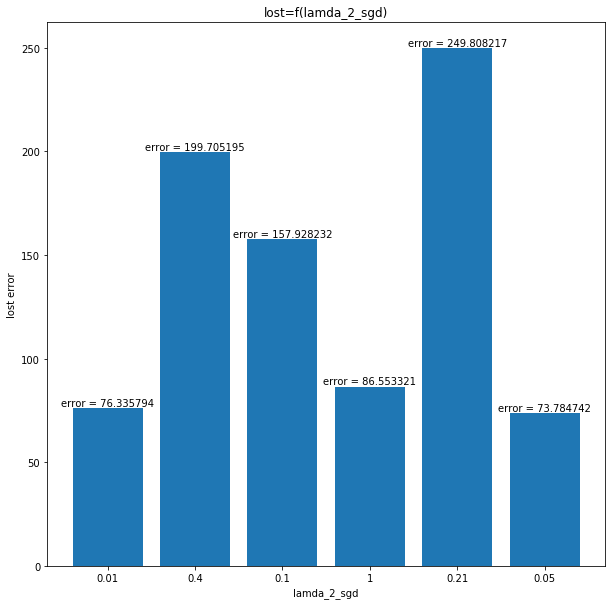

In [128]:
plot_hist(["0.01", "0.4", "0.1", "1", "0.21", "0.05"], error_cross_validation_lamda_2_, "lost=f(lamda_2_sgd)", "lamda_2_sgd", "lost error")

#### CROSS VALIDATION STEP SIZE

In [129]:
lamda_1 = 0.01
lamda_2 = 0.01
size_batch = 50

list_parameter_step_size = [0.01, 0.0002, 0.00001, 0.004, 0.005, 0.006]
# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, False)

error_cross_validation_step_size = list()
#error_k_fold = list()
for i in range(len(list_parameter_step_size)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])
        training_Y = data_Y[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])["bodyfat"]
    
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_mini_bath_SGD(training_X, training_Y, lamda_1, lamda_2, list_parameter_step_size[i], 10, 1, 80)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, lamda_1, lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_step_size.append(np.mean(error_k_fold))

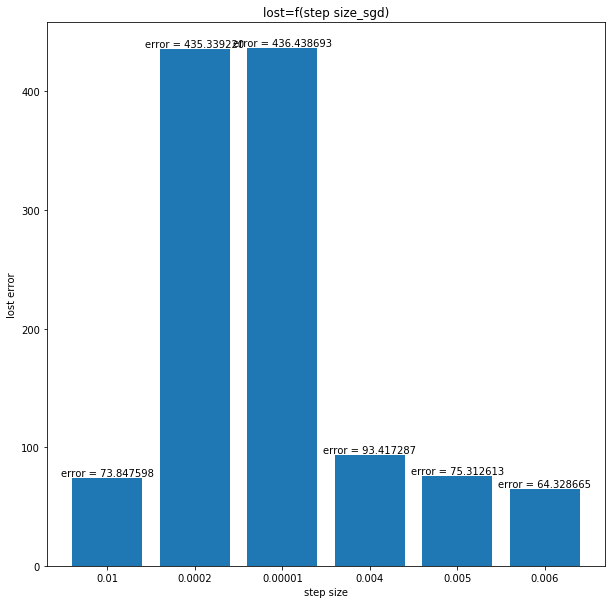

In [130]:
plot_hist(["0.01", "0.0002", "0.00001", "0.004", "0.005", "0.006"], error_cross_validation_step_size, "lost=f(step size_sgd)", "step size", "lost error")

## c) ADAM

In [139]:
# initialization
nb_neuronal_first_layer = 10

lamda_1 = 0.01
lamda_2 = 0.01
beta_1 = 0.01
beta_2 = 0.01
size_batch = 50
step_size = 0.02


W_1 = 0.1*np.random.rand(data_X.shape[1],nb_neuronal_first_layer )
W_2 = 0.1*np.random.rand(nb_neuronal_first_layer, 1)

In [140]:
def traning_adam(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, beta_1, beta_2, nb_iteration):
    """Training adam algorithm"""
    
    # initialize weight
    W_1 = 0.001*np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
    W_2 = 0.001*np.random.rand(nb_neuronal_first_layer, 1)#0.1*np.ones((1, nb_output_first_layer))
    delta = 0.001
    U_1, U_2 = gradient_loss_g_i(pd.DataFrame(data_X.iloc[0]).T, data_Y[0], 0*W_1, 0*W_2, lamda_1, lamda_2)
    
    V_1, V_2 = gradient_loss_g_i(pd.DataFrame(data_X.iloc[0]).T, data_Y[0], 0*W_1, 0*W_2, lamda_1, lamda_2)
    
    training_error = list()
    
    #print(W_2)
    k = random.randint(0,data_X.shape[0])%252
    for i in range(nb_iteration):

        W_1_grad, W_2_grad = gradient_loss_g_i(pd.DataFrame(data_X.iloc[k]).T, data_Y[k], W_1, W_2, lamda_1, lamda_2)
        
        U_1 = beta_1*U_1+(1-beta_1)*W_1_grad
        U_2 = beta_1*U_2+(1-beta_1)*W_2_grad
        
        V_1 = beta_2*V_1+(1-beta_2)*(W_1_grad*W_1_grad)
        V_2 = beta_2*V_2+(1-beta_2)*(W_2_grad*W_2_grad)
        
        W_1 = W_1 - ((((1-beta_2**(i+1))*V_1)**(1/2)+delta)**(-1/1))*((1-beta_1**(i+1))*U_1)
        W_2 = W_2 - ((((1-beta_2**(i+1))*V_2)**(1/2)+delta)**(-1/1))*((1-beta_1**(i+1))*U_2)
        
        min_max_scaler = preprocessing.MinMaxScaler()
        W_2 = min_max_scaler.fit_transform(W_2)
        W_1 = min_max_scaler.fit_transform(W_1)
        #print(W_1.shape)
        
        #print(np.linalg.norm(W_2_grad))
        loss_ = loss_function_f(data_X, data_Y, W_1, W_2, lamda_1, lamda_2)
        
        #print(loss_)
        training_error.append(loss_)
    
    return W_1, W_2, training_error

In [147]:
W_1, W_2, training_error = traning_adam(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, beta_1, beta_2, 1000)

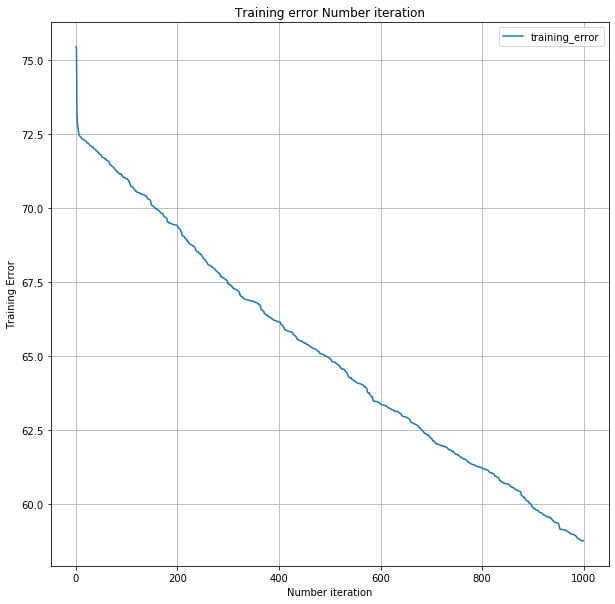

In [148]:
N = np.arange(len(training_error))
plot_figure(training_error, N, "training_error", "Training error Number iteration", 'Number iteration', 'Training Error')

#### CROSS VALIDATION

##### CROSS VALIDATION LAMDA 1

In [149]:
nb_neuronal_first_layer = 10
list_parameter_lamda_1 = [0.01, 10, 0.1, 1, 0.21, 5]
lamda_2 = 0.01
beta_1 = 0.01
beta_2 = 0.01
step_size = 0.002

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_1_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_1)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_adam(data_X, data_Y, list_parameter_lamda_1[i], lamda_2, step_size, nb_neuronal_first_layer, beta_1, beta_2, 200)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, list_parameter_lamda_1[i], lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_1_.append(np.mean(error_k_fold))

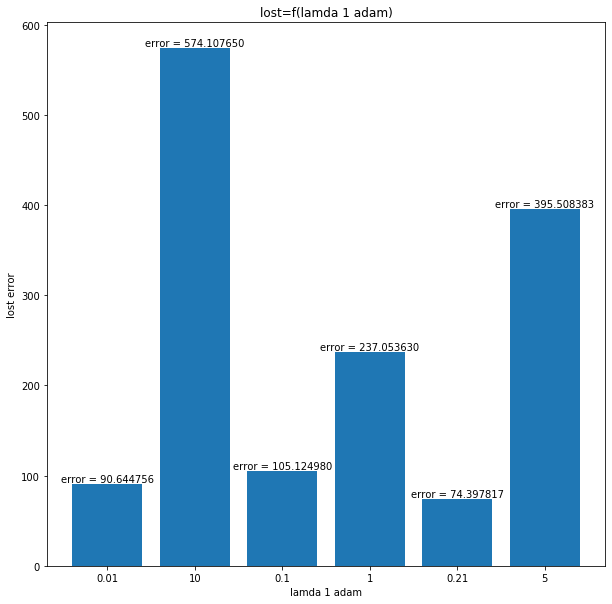

In [150]:
plot_hist(["0.01", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_1_, "lost=f(lamda 1 adam)", "lamda 1 adam", "lost error")

#### CROSS VALIDATION LAMDA 2

In [151]:
nb_neuronal_first_layer = 10
lamda_1 = 0.01
list_parameter_lamda_2 = [0.01, 10, 0.1, 1, 0.21, 5]
beta_1 = 0.01
beta_2 = 0.01
step_size = 0.002

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_2_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_2)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_adam(data_X, data_Y, lamda_1, list_parameter_lamda_2[i], step_size, nb_neuronal_first_layer, beta_1, beta_2, 200)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, list_parameter_lamda_2[i], lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_2_.append(np.mean(error_k_fold))

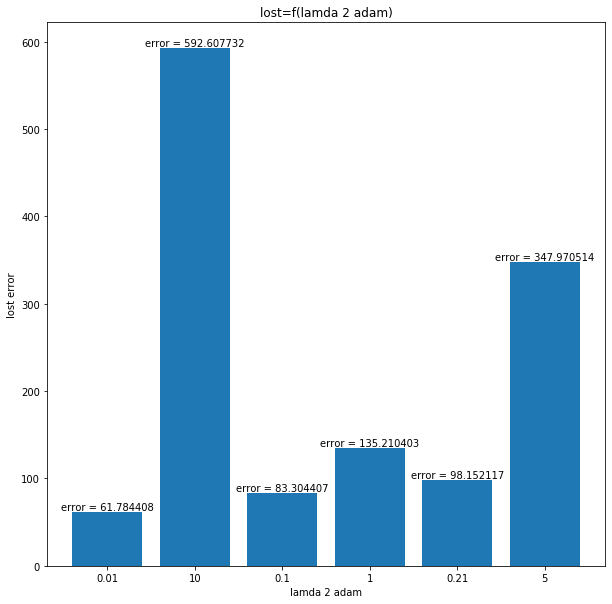

In [152]:
plot_hist(["0.01", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_2_, "lost=f(lamda 2 adam)", "lamda 2 adam", "lost error")

##### CROSS VALIDATION STEP SIZE

In [153]:
nb_neuronal_first_layer = 10
lamda_1 = 0.01
lamda_2 = 0.01
beta_1 = 0.01
beta_2 = 0.01
list_parameter_step_size = [0.01, 0.0002, 0.03, 0.004, 0.005, 0.006]


# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_step_size_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_step_size)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_adam(data_X, data_Y, lamda_1, lamda_2, list_parameter_step_size[i], nb_neuronal_first_layer, beta_1, beta_2, 200)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, lamda_2, lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_step_size_.append(np.mean(error_k_fold))

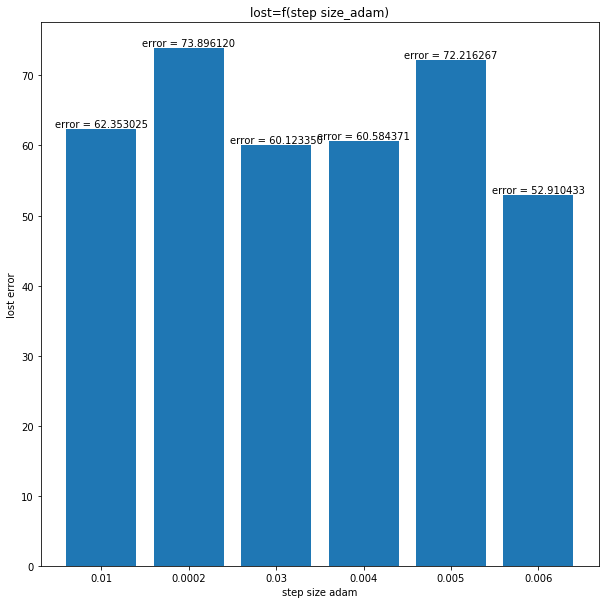

In [154]:
plot_hist(["0.01", "0.0002", "0.03", "0.004", "0.005", "0.006"], error_cross_validation_step_size_, "lost=f(step size_adam)", "step size adam", "lost error")

##### CROSS VALIDATION BETA 1

In [155]:
nb_neuronal_first_layer = 10
lamda_1 = 0.01
lamda_2 = 0.01
list_beta_1 = [0.01, 0.0002, 0.03, 0.004, 0.005, 0.006]
beta_2 = 0.01
step_size = 0.01


# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_beta_1 = list()
#error_k_fold = list()
for i in range(len(list_beta_1)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_adam(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, list_beta_1[i], beta_2, 150)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, lamda_2, lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_beta_1.append(np.mean(error_k_fold))

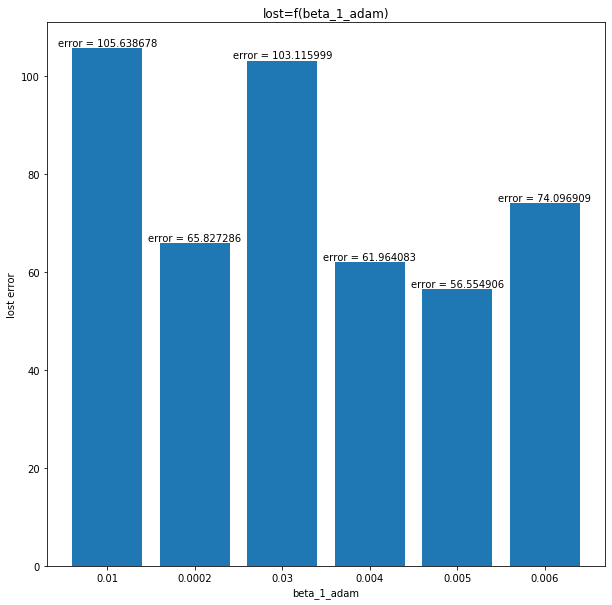

In [156]:
plot_hist(["0.01", "0.0002", "0.03", "0.004", "0.005", "0.006"], error_cross_validation_beta_1, "lost=f(beta_1_adam)", "beta_1_adam", "lost error")

##### CROSS VALIDATION BETA 2

In [157]:
nb_neuronal_first_layer = 10
lamda_1 = 0.01
lamda_2 = 0.01
list_beta_2 = [0.01, 0.0002, 0.03, 0.004, 0.005, 0.006]
beta_1 = 0.01
step_size = 0.01


# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_beta_2 = list()
#error_k_fold = list()
for i in range(len(list_beta_2)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_adam(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, beta_1, list_beta_2[i], 150)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, lamda_2, lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_beta_2.append(np.mean(error_k_fold))

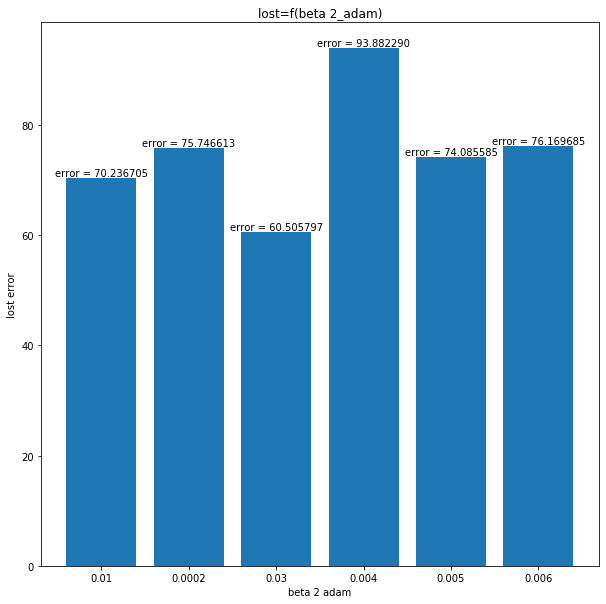

In [158]:
plot_hist(["0.01", "0.0002", "0.03", "0.004", "0.005", "0.006"], error_cross_validation_beta_2, "lost=f(beta 2_adam)", "beta 2 adam", "lost error")

## d) BCD

#### INITIALIZATION

In [199]:
# initialization
nb_neuronal_first_layer = 25

lamda_1 = 0.01
lamda_2 = 0.01
step_size = 0.0001

W_1 = np.random.rand(nb_neuronal_first_layer, data_X.shape[1])
W_2 = np.random.rand(1,nb_neuronal_first_layer)

#### TRAINING ALGORITHM

In [205]:
def traning_mini_bath_BCD(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, nb_iteration):
    """we use this function for training the weights using mini bath sge """
    
    # initialize weight
    W_1 = 0.1*np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
    W_2 = 0.1*np.random.rand(nb_neuronal_first_layer,1)
    training_error = list()
    #print(W_2)
    for i in range(nb_iteration):

        W_1_grad, W_2_grad_ = gradient_loss_f(data_X, data_Y, W_1, W_2, lamda_1, lamda_2)

        W_1_grad_, W_2_grad = gradient_loss_f(data_X, data_Y, W_1_grad, W_2_grad_, lamda_1, lamda_2)
        
        loss_ = loss_function_f(data_X, data_Y, W_1, W_2, lamda_1, lamda_2)
        
        min_max_scaler = preprocessing.MinMaxScaler()
        W_1_grad = min_max_scaler.fit_transform(W_1_grad)
        W_2_grad = min_max_scaler.fit_transform(W_2_grad)
        
        #print(loss_)
        training_error.append(loss_)
        #print(W_2)
        W_1 = W_1 - step_size*W_1_grad
        W_2 = W_2 - step_size*W_2_grad
    #print(W_2)
    return W_1, W_2, training_error
    

In [206]:
l1, l2, training_error = traning_mini_bath_BCD(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, 10000)

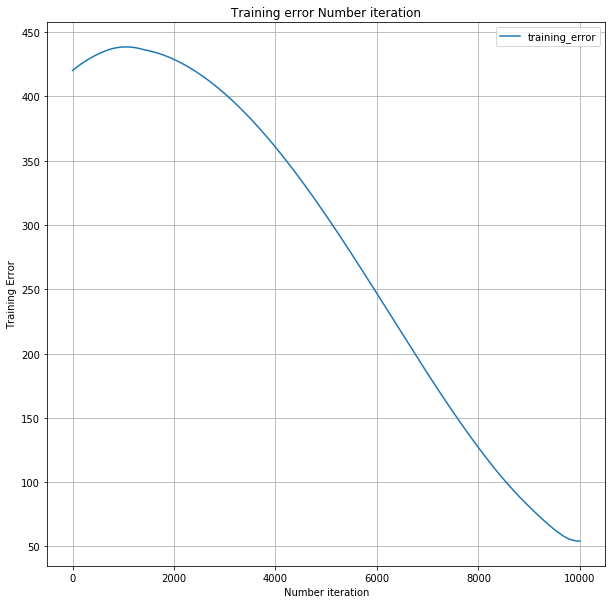

In [207]:
N = np.arange(len(training_error))
plot_figure(training_error, N, "training_error", "Training error Number iteration", 'Number iteration', 'Training Error')

#### CROSS VALIDATION

##### Cross Validation in fact Lamda 1

In [209]:
nb_neuronal_first_layer = 10
list_parameter_lamda_1 = [0.01, 10, 0.1, 1, 0.21, 5]
lamda_2 = 0.01
step_size = 0.01

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_1_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_1)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_mini_bath_BCD(data_X, data_Y, list_parameter_lamda_1[i], lamda_2, step_size, nb_neuronal_first_layer, 130)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, list_parameter_lamda_1[i], lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_1_.append(np.mean(error_k_fold))

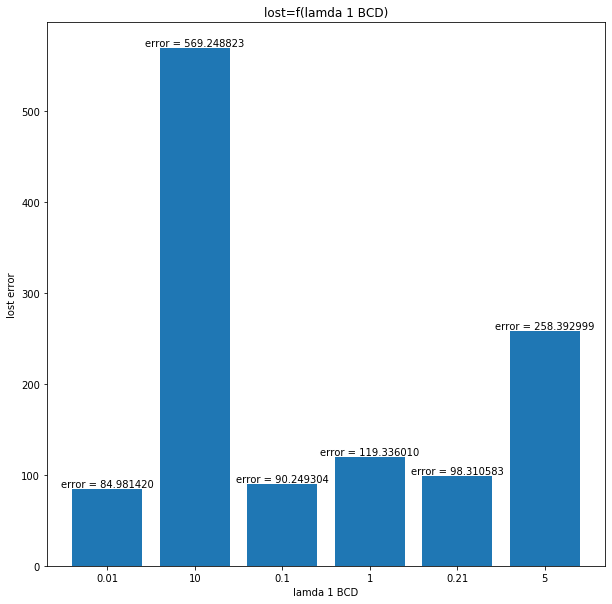

In [210]:
plot_hist(["0.01", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_1_, "lost=f(lamda 1 BCD)", "lamda 1 BCD", "lost error")

##### Cross Validation in fact Lamda 2

In [211]:
nb_neuronal_first_layer = 10
lamda_1 = 0.01
list_parameter_lamda_2 = [0.01, 10, 0.1, 1, 0.21, 5]
step_size = 0.01

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_2_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_2)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_mini_bath_BCD(data_X, data_Y, lamda_1, list_parameter_lamda_2[i], step_size, nb_neuronal_first_layer, 130)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, list_parameter_lamda_2[i], lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_2_.append(np.mean(error_k_fold))

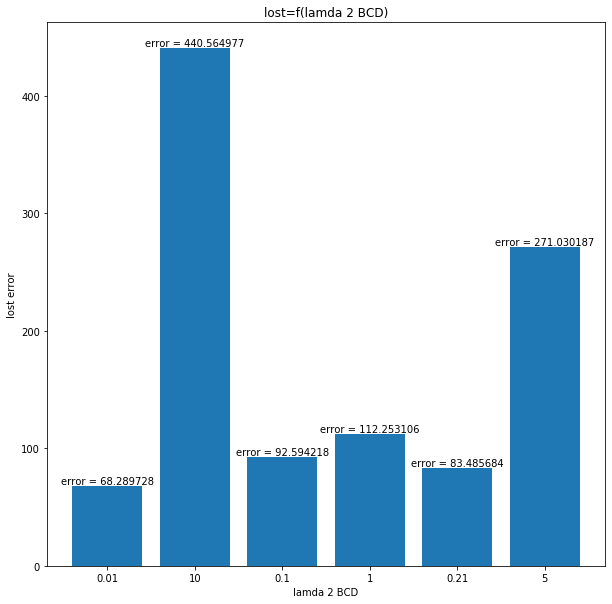

In [212]:
plot_hist(["0.01", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_2_, "lost=f(lamda 2 BCD)", "lamda 2 BCD", "lost error")

#### CROSS VALIDATION STEP SIZE

In [236]:
nb_neuronal_first_layer = 15
lamda_1 = 0.1
lamda_2 = 0.1
list_parameter_step_size = [0.01, 0.0002, 0.03, 0.004, 0.005, 0.006]


# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_step_size_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_step_size)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_mini_bath_BCD(training_X, training_Y, lamda_1, lamda_2, list_parameter_step_size[i], nb_neuronal_first_layer, 1)
        tamp_1 = loss_function_f(testing_X, testing_Y, l1, l2, lamda_1, lamda_2)
        error_k_fold.append(tamp_1)
    error_cross_validation_step_size_.append(np.mean(error_k_fold))

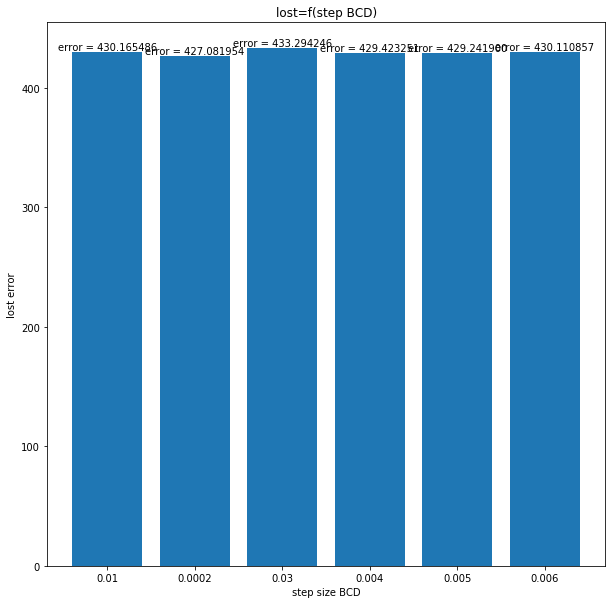

In [237]:
plot_hist(["0.01", "0.0002", "0.03", "0.004", "0.005", "0.006"], error_cross_validation_step_size_, "lost=f(step BCD)", "step size BCD", "lost error")

## COMPARISON OF METHODS

#### Split Data Training and Testing 

In [238]:
# size data
size_data = data_X.shape[0]
nb_kfold = 4
# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

training_index = []

for k in range(nb_kfold-1):
    training_index = np.concatenate((training_index, k_fold_index[k]))

training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
training_Y = data_Y.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
testing_Y = data_Y.T[[x not in training_index for x in  data_X.index.values.tolist()]].T

In [239]:
Training_error = list()
Testing_error = list()

##### BP :

In [240]:
# initialization
nb_neuronal_first_layer = 10

lamda_1 = 0.01
lamda_2 = 0.01
step_size = 0.01


l1, l2, training_error = traning_BP(training_X, training_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, 100)
training_error = np.mean(training_error)
testing_error = np.mean(loss_function_f(testing_X, testing_Y, l1, l2, lamda_1, lamda_2))
Training_error.append(training_error)
Testing_error.append(testing_error)
BP_error = np.abs(training_error-testing_error)
mse_BP = np.sum((forward_deep(testing_X, l1, l2)-testing_Y)**2)/testing_X.shape[0]

##### SGD :

In [241]:
# initialization
nb_neuronal_first_layer = 10

lamda_1 = 0.01
lamda_2 = 0.01
size_batch = 50
step_size = 0.002

l1, l2, training_error = traning_mini_bath_SGD(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, size_batch, 115)
training_error = np.mean(training_error)
testing_error = np.mean(loss_function_f(testing_X, testing_Y, l1, l2, lamda_1, lamda_2))
SGD_error = np.abs(training_error-testing_error)
Training_error.append(training_error)
Testing_error.append(testing_error)
mse_MINI_SGD = np.sum((forward_deep(testing_X, l1, l2)-testing_Y)**2)/testing_X.shape[0]

##### ADAM

In [242]:
# initialization
nb_neuronal_first_layer = 10

lamda_1 = 0.01
lamda_2 = 0.01
beta_1 = 0.01
beta_2 = 0.01
size_batch = 50
step_size = 0.002


L1, L2, training_error = traning_adam(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, beta_1, beta_2, 200)
training_error = np.mean(training_error)
testing_error = np.mean(loss_function_f(testing_X, testing_Y, l1, l2, lamda_1, lamda_2))
ADAM_error = np.abs(training_error-testing_error)
Training_error.append(training_error)
Testing_error.append(testing_error)
mse_ADAM = np.sum((forward_deep(testing_X, l1, l2)-testing_Y)**2)/testing_X.shape[0]

##### BCD

In [243]:
# initialization
nb_neuronal_first_layer = 10

lamda_1 = 0.02
lamda_2 = 0.05
step_size = 0.012

#W_1 = np.ones((nb_neuronal_first_layer, data_X.shape[1]))
#W_2 = np.ones((1, nb_neuronal_first_layer))
W_1 = np.random.rand(nb_neuronal_first_layer, data_X.shape[1])
W_2 = np.random.rand(1,nb_neuronal_first_layer)

l1, l2, training_error = traning_mini_bath_BCD(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, 130)
training_error = np.mean(training_error)
testing_error = np.mean(loss_function_f(testing_X, testing_Y, l1, l2, lamda_1, lamda_2))
#BCD_error = np.abs(training_error-testing_error)
Training_error.append(training_error)
Testing_error.append(testing_error)
mse_BCD = np.sum((forward_deep(testing_X, l1, l2)-testing_Y)**2)/testing_X.shape[0]

##### MSE HIST

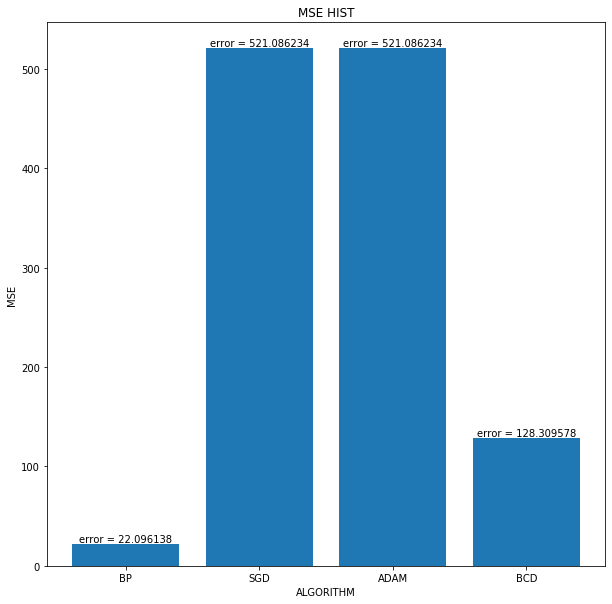

In [244]:
plot_hist(["BP", "SGD", "ADAM", "BCD"], [mse_BP, mse_MINI_SGD, mse_ADAM, mse_BCD], "MSE HIST", "ALGORITHM", "MSE")

##### ERROR TRAINING TESTING

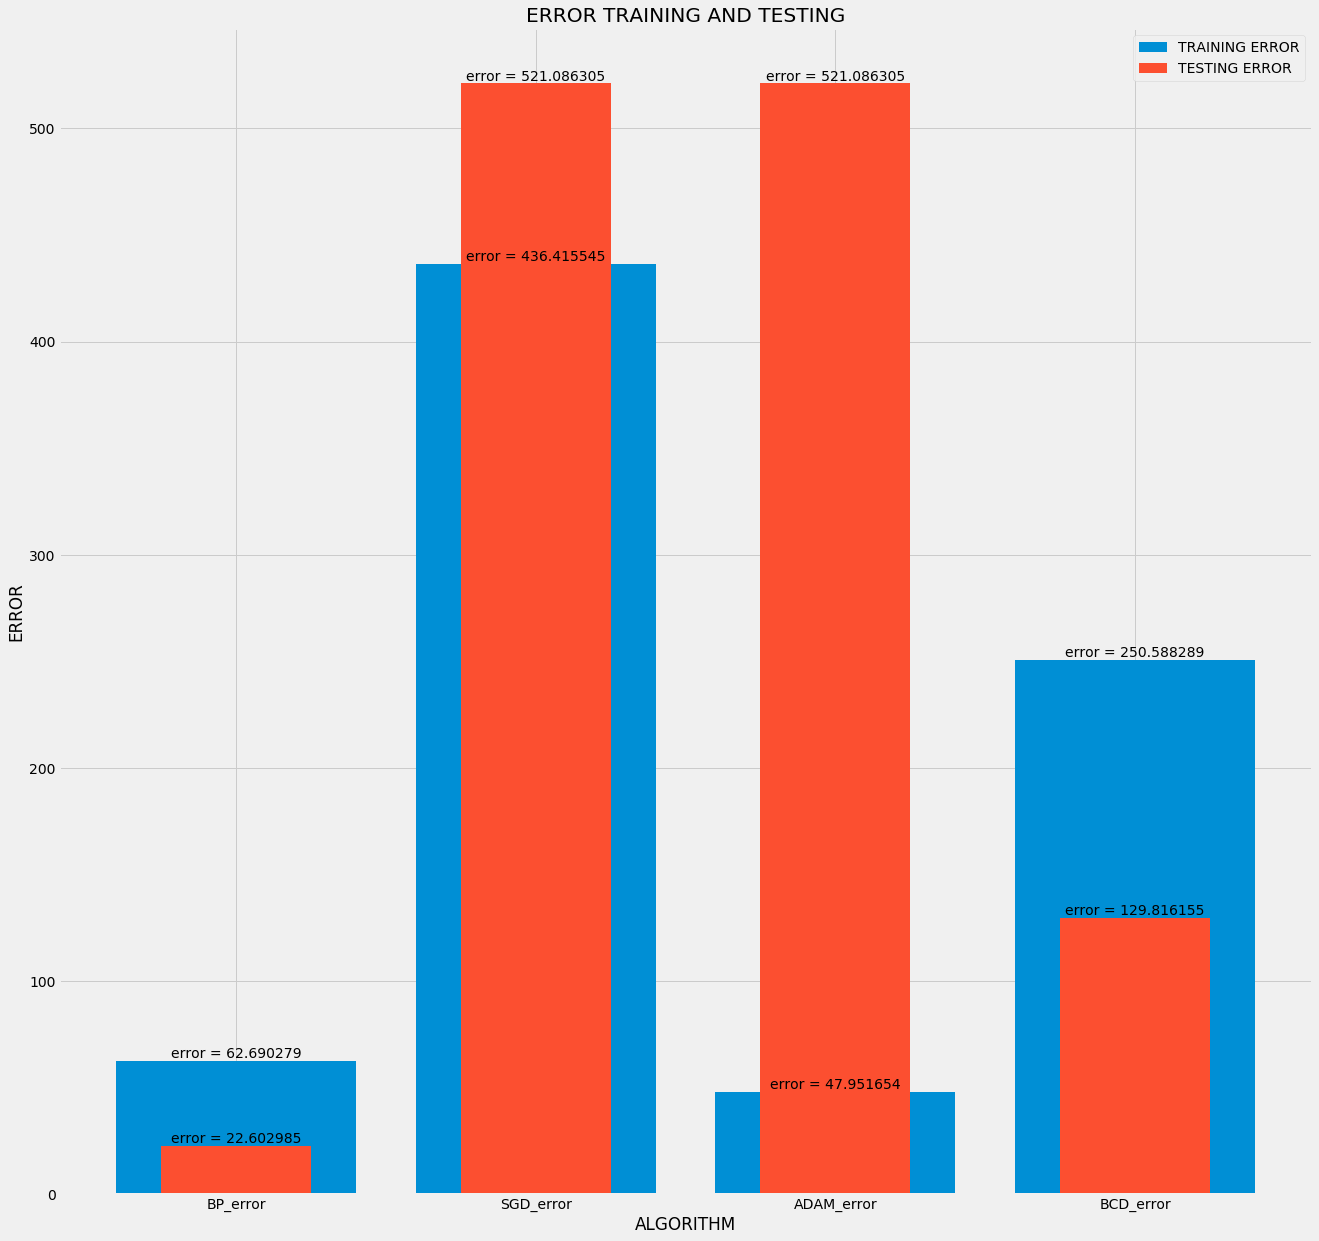

In [245]:
plt.style.use('fivethirtyeight')


plt.figure(figsize=(20,20))
width = 0.35 
unit = Training_error

k_value = ["BP_error", "SGD_error", "ADAM_error", "BCD_error"]
plot = plt.bar(k_value, Training_error, label = "TRAINING ERROR")
plot1 = plt.bar(k_value, Testing_error, width=0.5, label = "TESTING ERROR")
 
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2., height,'error = %f' % height, ha='center', va='bottom')
    
for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2., height,'error = %f' % height, ha='center', va='bottom')
 
plt.title("ERROR TRAINING AND TESTING")
plt.xlabel("ALGORITHM")
plt.ylabel("ERROR")

plt.savefig('training_testing_error.png')
plt.legend()
# show the graph
plt.show()

# Part 2: deep neaural network

##### NORMALIZATION TRAINING TARGET

In [246]:
data_Y_II = data_Y/np.max(data_Y)

#### SIGMOID FUNCTION

In [247]:
def sigmoid_function(x):
    """This function compute the siigmoid of variable x"""
    
    tampon = 1 + np.exp(-x)
    return 1/tampon

#### GRADIENT SIGMOID

In [248]:
def gradient_sigmoid_function(x):
    """This function compute the gradient of the sigmoid"""
    
    tampon = (1 + np.exp(-x))**2
    return np.exp(-x)/tampon

#### FORWARD FUNCTION

In [249]:
def forward_deep_II(data_X, W_1, W_2):
    """forward function"""
    
    z_1 = sigmoid_function(np.dot(data_X.values, W_1))
    return np.ravel(gradient_sigmoid_function(np.dot(z_1, W_2)))

#### LOST FUNCTION

In [250]:
def loss_function_f_II(data_X, data_Y, W_1, W_2, lamda_1, lamda_2):
    """this function computhe the loss function of f"""
    tamp_1 = (forward_deep_II(data_X, W_1, W_2)-data_Y)
    
    loss_ = (np.linalg.norm(tamp_1)**2)/data_X.shape[0]+lamda_1*(np.linalg.norm(W_1)**2)+lamda_2*(np.linalg.norm(W_2)**2)
 
    return loss_

#### GRADIENT g_i FUNCTION

In [251]:
def gradient_loss_g_i_II(X_i, Y_i, W_1, W_2, lamda_1, lamda_2):
    """This function build the gradient of the function g_i as define in the rapport"""
    
    tamp_0 = forward_deep_II(X_i, W_1, W_2)-Y_i
    tamp_1 = gradient_sigmoid_function(np.dot(sigmoid_function(np.dot(X_i.values, W_1)),W_2))
    tamp_3 = tamp_0*tamp_1
    
    tamp_4 = np.dot(tamp_3, W_2.T)
    
    tamp_5 = sigmoid_function(np.dot(X_i.values, W_1))
    
    tamp_6 = gradient_sigmoid_function(np.dot(X_i.values, W_1))

    tamp_7 = tamp_4*tamp_6
    
    W_1_grad = np.dot(X_i.T.values, tamp_7)
    W_2_grad = 2*np.dot(tamp_5.T, tamp_3)+2*lamda_2*W_2
    
    return W_1_grad, W_2_grad

#### GRADIENT LOSS FUNCTION F

In [252]:
def gradient_loss_f_II(data_X, data_Y, W_1, W_2, lamda_1, lamda_2):
    """This function compute the gradien for dataset"""
        
    tamp_0 = forward_deep_II(data_X, W_1, W_2)-data_Y
    tamp_0 = tamp_0.values.reshape(-1,1)
    tamp_1 = gradient_sigmoid_function(np.dot(sigmoid_function(np.dot(data_X.values, W_1)),W_2))
    tamp_3 = tamp_0*tamp_1
    
    tamp_4 = np.dot(tamp_3, W_2.T)
    
    tamp_5 = sigmoid_function(np.dot(data_X.values, W_1))
    
    tamp_6 = gradient_sigmoid_function(np.dot(data_X.values, W_1))
    
    tamp_7 = tamp_4*tamp_6
    
    W_1_grad = np.dot(data_X.T.values, tamp_7)
    W_2_grad = 2*np.dot(tamp_5.T, tamp_3)+2*lamda_2*W_2
        
    return W_1_grad, W_2_grad

## - BP with constant step-size:

#### INITIALIZATION

In [266]:
# initialization
nb_neuronal_first_layer = 5

lamda_1 = 0.02
lamda_2 = 0.05
step_size = 0.012

W_1 = np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
W_2 = np.random.rand(nb_neuronal_first_layer, 1)

#### TRAINING ALGORITHM

In [267]:
def traning_BP_II(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, nb_iteration):
    """uses this algorithm for training weights"""
    
    x = data_X.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data_X = pd.DataFrame(x_scaled)
    
    # initialize weight
    W_1 = 0.01*np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
    W_2 = 0.01*np.random.rand(nb_neuronal_first_layer, 1)#0.1*np.ones((1, nb_output_first_layer))
    
    training_error_II = list()
    
    for i in range(nb_iteration):
        
        W_1_grad, W_2_grad = gradient_loss_f_II(data_X, data_Y, W_1, W_2, lamda_1, lamda_2)
    
        loss_ = loss_function_f_II(data_X, data_Y, W_1, W_2, lamda_1, lamda_2)
        training_error_II.append(loss_)
        
        W_1 = W_1 - step_size*W_1_grad
        W_2 = W_2 - step_size*W_2_grad
    
    return W_1, W_2, training_error_II

In [268]:
l1, l2, training_error_II = traning_BP_II(data_X, data_Y_II, lamda_1, lamda_2, 1, 5, 130)

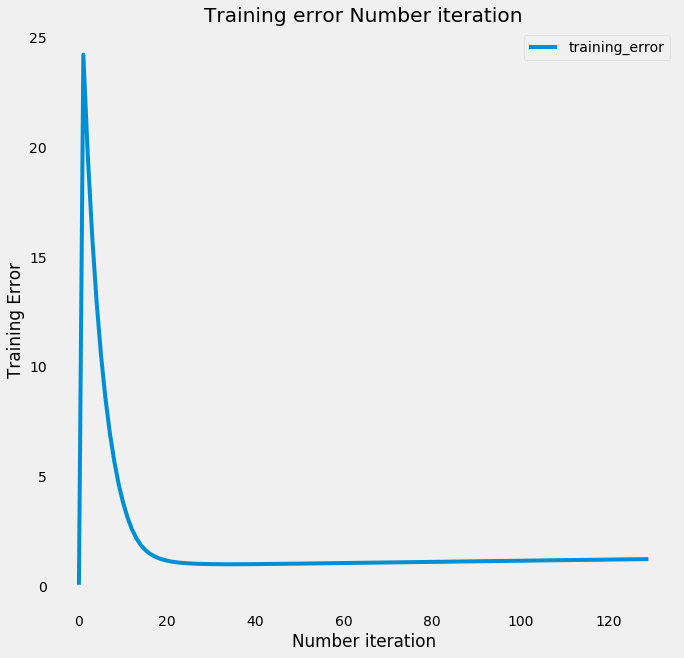

In [269]:
N = np.arange(len(training_error_II))
plot_figure(training_error_II, N, "training_error", "Training error Number iteration", 'Number iteration', 'Training Error')

#### CROSS VALIDATION

In [270]:
# initialization
nb_neuronal_first_layer = 5

lamda_1 = 0.02
lamda_2 = 0.05
step_size = 1

W_1 = 0.1*np.random.rand(data_X.shape[1],nb_neuronal_first_layer)
W_2 = 0.1*np.random.rand(nb_neuronal_first_layer, 1)

##### Cross Validation in fact Lamda 1

In [271]:
lamda_2 = 0.1
step_size = 1
nb_neuronal_first_layer = 5
list_parameter_lamda_1 = [0.01, 10, 0.1, 1, 0.21, 5]

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_1_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_1)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y_II.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_BP_II(testing_X, testing_Y, list_parameter_lamda_1[i], lamda_2, step_size, nb_neuronal_first_layer, 100)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, list_parameter_lamda_1[i], lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_1_.append(np.mean(error_k_fold))

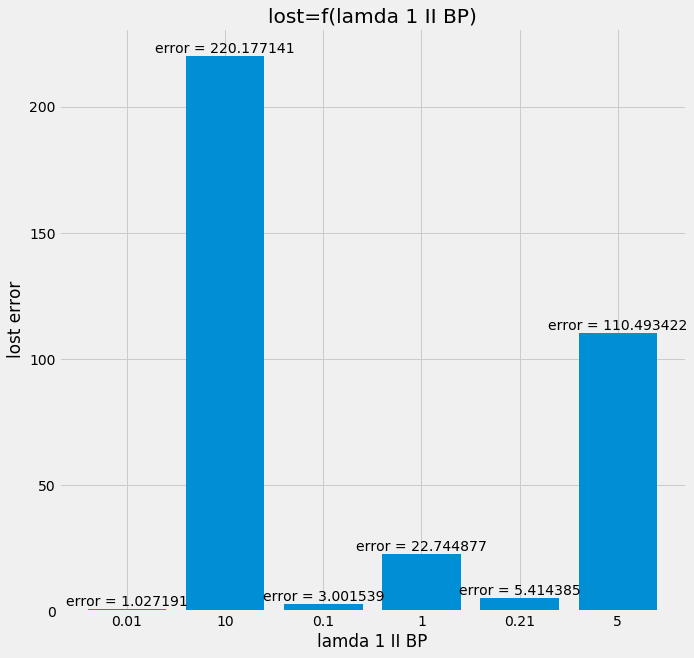

In [272]:
plot_hist(["0.01", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_1_, "lost=f(lamda 1 II BP)", "lamda 1 II BP", "lost error")

##### Cross Validation in fact Lamda 2

In [273]:
lamda_1 = 0.1
step_size = 1
nb_neuronal_first_layer = 5
list_parameter_lamda_2 = [0.01, 0.001, 0.1, 1, 0.21, 0.05]

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_2_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_2)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y_II.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_BP_II(testing_X, testing_Y, lamda_2, list_parameter_lamda_2[i], step_size, nb_neuronal_first_layer, 100)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2,  lamda_2, list_parameter_lamda_2[i])
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_2_.append(np.mean(error_k_fold))

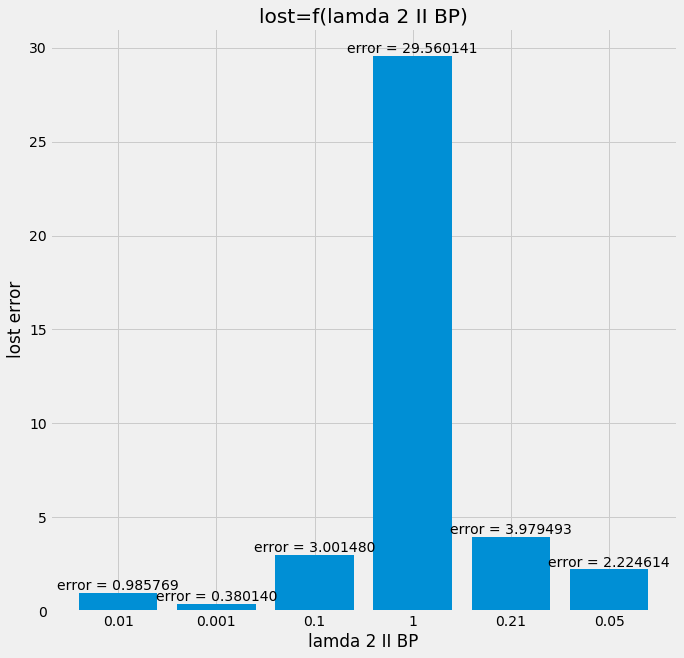

In [274]:
plot_hist(["0.01", "0.001", "0.1", "1", "0.21", "0.05"], error_cross_validation_lamda_2_, "lost=f(lamda 2 II BP)", "lamda 2 II BP", "lost error")

##### Cross Validation in Step Size

In [275]:
lamda_1 = 0.1

lamda_2 = 0.001
list_parameter_step_size = [0.1, 0.02, 0.3, 0.04, 0.5, 0.6, 1]
nb_neuronal_first_layer = 5
# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_step_size_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_step_size)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y_II.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_BP_II(testing_X, testing_Y, lamda_2, lamda_2, list_parameter_step_size[i], nb_neuronal_first_layer, 100)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2,  lamda_2, lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_step_size_.append(np.mean(error_k_fold))

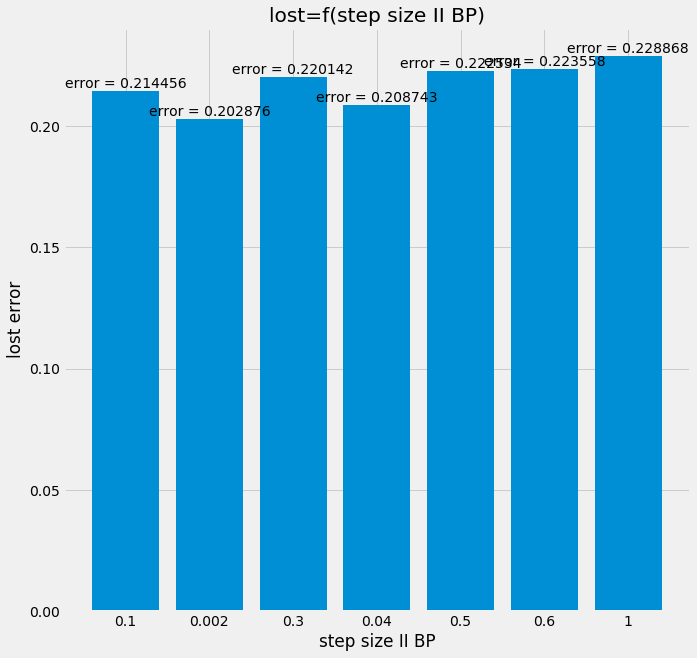

In [276]:
plot_hist(["0.1", "0.002", "0.3", "0.04", "0.5", "0.6", "1"], error_cross_validation_step_size_, "lost=f(step size II BP)", "step size II BP", "lost error")

## - Mini-Bath SGD

#### INITIALIZATION

In [319]:
# initialization
nb_neuronal_first_layer = 10

lamda_1 = 0.02
lamda_2 = 0.05
size_batch = 1
step_size = 0.001


W_1 = np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
W_2 = np.random.rand(nb_neuronal_first_layer, 1)

#### TRAINING ALGORITHM

In [332]:
def traning_mini_bath_SGD_II(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, size_batch, nb_iteration):
    """we use this function for training the weights using mini bath sge """
    
    x = data_X.values #returns a numpy array
    #min_max_scaler = preprocessing.MinMaxScaler()
    #x_scaled = min_max_scaler.fit_transform(x)
    #data_X = pd.DataFrame(x_scaled)
    
    # initialize weight
    W_1 = 0.01*np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
    W_2 = 0.01*np.random.rand(nb_neuronal_first_layer, 1)#0.1*np.ones((1, nb_output_first_layer))
    training_error = list()
    
    batch_list = [random.randint(0,data_X.shape[0])%data_X.shape[0] for i in range(size_batch)]

    for i in range(nb_iteration):
        
        W_1_g = 0*np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
        W_2_g = 0*np.random.rand(nb_neuronal_first_layer, 1)
        
        for j in batch_list:
            W_1_grad, W_2_grad = gradient_loss_g_i_II(pd.DataFrame(data_X.iloc[j]).T, pd.DataFrame([data_Y[j]]), W_1, W_2, lamda_1, lamda_2)
    
            W_1_g = W_1_g + W_1_grad
            W_2_g = W_2_g + W_2_grad
            
        #print(np.linalg.norm(W_2_grad))
        loss_ = loss_function_f_II(data_X, data_Y, W_1, W_2, lamda_1, lamda_2)
        
        #print(loss_)
        training_error.append(loss_)
        
        W_1 = W_1 - step_size*W_1_g
        W_2 = W_2 - step_size*W_2_g
    
    return W_1, W_2, training_error

In [333]:
l1, l2, training_error = traning_mini_bath_SGD_II(data_X, data_Y_II, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, size_batch,130)

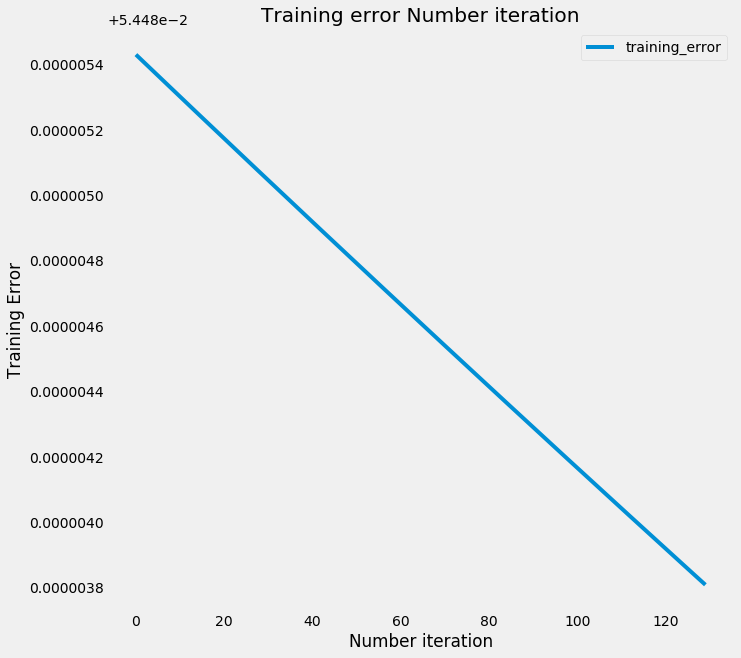

In [334]:
N = np.arange(len(training_error))
plot_figure(training_error, N, "training_error", "Training error Number iteration", 'Number iteration', 'Training Error')

#### CROSS VALIDATION

In [335]:
# initialization list of parameter to test
nb_kfold = 3
nb_neurone = 5

##### Cross Validation in fact Lamda 1

In [336]:
lamda_2 = 0.1
step_size = 1
nb_neuronal_first_layer = 5
list_parameter_lamda_1 = [0.01, 10, 0.1, 1, 0.21, 5]

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_1_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_1)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y_II.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_mini_bath_SGD_II(data_X, data_Y_II, list_parameter_lamda_1[i], lamda_2, step_size, nb_neuronal_first_layer, size_batch, 100)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, list_parameter_lamda_1[i], lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_1_.append(np.mean(error_k_fold))

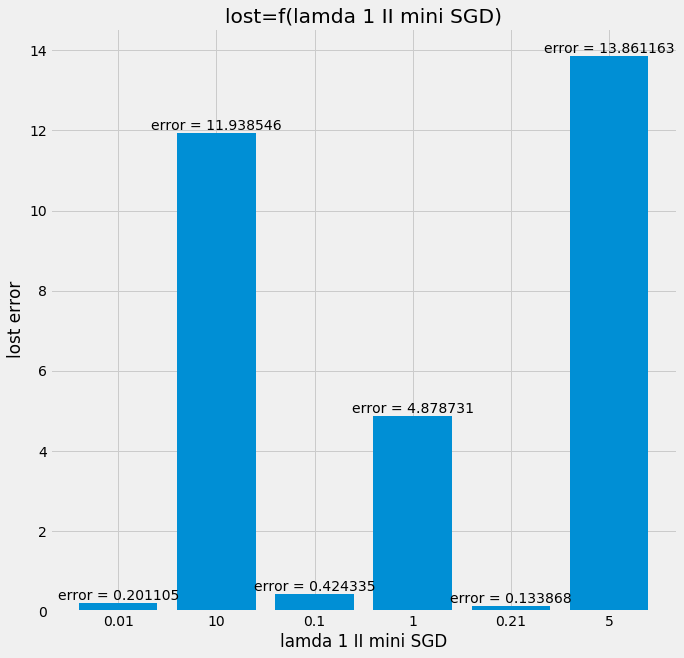

In [337]:
plot_hist(["0.01", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_1_, "lost=f(lamda 1 II mini SGD)", "lamda 1 II mini SGD", "lost error")

##### Cross Validation in fact Lamda 2

In [338]:
lamda_1 = 0.1
step_size = 1
nb_neuronal_first_layer = 5
list_parameter_lamda_2 = [0.01, 0.001, 0.1, 1, 0.21, 0.5]

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_2_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_2)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y_II.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_mini_bath_SGD_II(data_X, data_Y_II, lamda_1, list_parameter_lamda_2[i], step_size, nb_neuronal_first_layer, size_batch, 100)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, list_parameter_lamda_2[i])
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_2_.append(np.mean(error_k_fold))

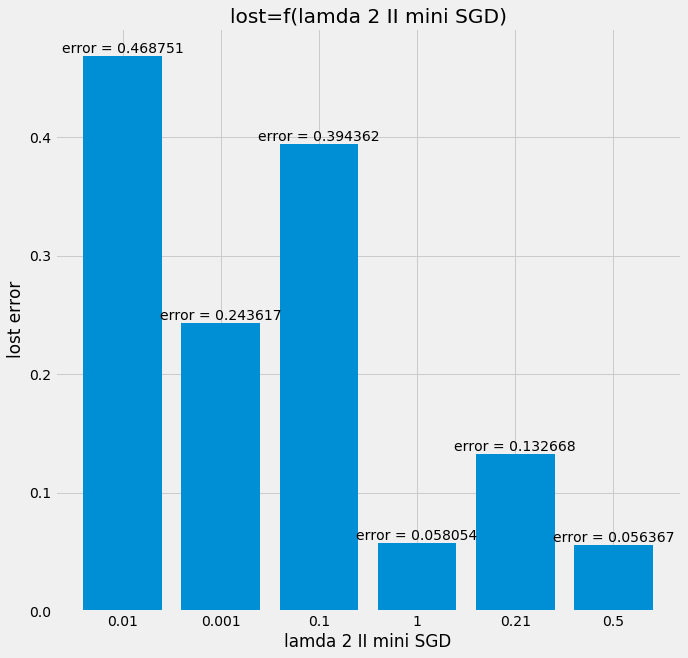

In [339]:
plot_hist(["0.01", "0.001", "0.1", "1", "0.21", "0.5"], error_cross_validation_lamda_2_, "lost=f(lamda 2 II mini SGD)", "lamda 2 II mini SGD", "lost error")

##### Cross Validation in Step Size

In [340]:
lamda_1 = 0.1
step_size = 1
nb_neuronal_first_layer = 5
lamda_2 = 0.01
list_parameter_step_size = [0.1, 0.02, 0.3, 0.04, 0.5, 0.6, 1]

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_step_size_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_step_size)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
        training_Y = data_Y_II.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_mini_bath_SGD_II(data_X, data_Y_II, lamda_1, lamda_2, list_parameter_step_size[i], nb_neuronal_first_layer, size_batch, 100)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_step_size_.append(np.mean(error_k_fold))

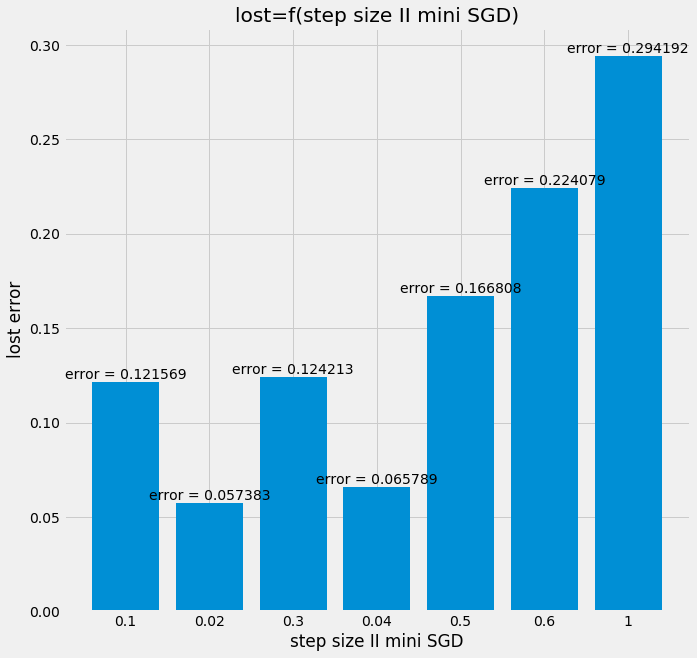

In [341]:
plot_hist(["0.1", "0.02", "0.3", "0.04", "0.5", "0.6", "1"], error_cross_validation_step_size_, "lost=f(step size II mini SGD)", "step size II mini SGD", "lost error")

## c) ADAM

In [342]:
# initialization
nb_neuronal_first_layer = 10

lamda_1 = 0.01
lamda_2 = 0.01
beta_1 = 0.01
beta_2 = 0.01
size_batch = 50
step_size = 0.002


W_1 = 0.1*np.random.rand(data_X.shape[1],nb_neuronal_first_layer )
W_2 = 0.1*np.random.rand(nb_neuronal_first_layer, 1)

In [346]:
def traning_adam_II(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, beta_1, beta_2, nb_iteration):
    """Training adam algorithm"""
    
    # initialize weight
    W_1 = 0.001*np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
    W_2 = 0.001*np.random.rand(nb_neuronal_first_layer, 1)#0.1*np.ones((1, nb_output_first_layer))
    delta = 0.001
    U_1, U_2 = gradient_loss_g_i(pd.DataFrame(data_X.iloc[0]).T, data_Y[0], 0*W_1, 0*W_2, lamda_1, lamda_2)
    
    V_1, V_2 = gradient_loss_g_i(pd.DataFrame(data_X.iloc[0]).T, data_Y[0], 0*W_1, 0*W_2, lamda_1, lamda_2)
    
    training_error = list()
    
    k = random.randint(0,data_X.shape[0])%data_X.shape[0]
    #print(W_2)
    for i in range(nb_iteration):

        W_1_grad, W_2_grad = gradient_loss_g_i_II(pd.DataFrame(data_X.iloc[k]).T, data_Y[k], W_1, W_2, lamda_1, lamda_2)
        
        U_1 = beta_1*U_1+(1-beta_1)*W_1_grad
        U_2 = beta_1*U_2+(1-beta_1)*W_2_grad
        
        V_1 = beta_2*V_1+(1-beta_2)*(W_1_grad*W_1_grad)
        V_2 = beta_2*V_2+(1-beta_2)*(W_2_grad*W_2_grad)
        
        W_1 = W_1 - ((((1-beta_2**(i+1))*V_1)**(1/2)+delta)**(-1/1))*((1-beta_1**(i+1))*U_1)
        W_2 = W_2 - ((((1-beta_2**(i+1))*V_2)**(1/2)+delta)**(-1/1))*((1-beta_1**(i+1))*U_2)
        
        min_max_scaler = preprocessing.MinMaxScaler()
        W_2 = min_max_scaler.fit_transform(W_2)
        W_1 = min_max_scaler.fit_transform(W_1)
        #print(W_1.shape)
        
        #print(np.linalg.norm(W_2_grad))
        loss_ = loss_function_f_II(data_X, data_Y, W_1, W_2, lamda_1, lamda_2)
        
        #print(loss_)
        training_error.append(loss_)
    
    return W_1, W_2, training_error

In [347]:
W_1, W_2, training_error = traning_adam_II(data_X, data_Y_II, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, beta_1, beta_2, 200)

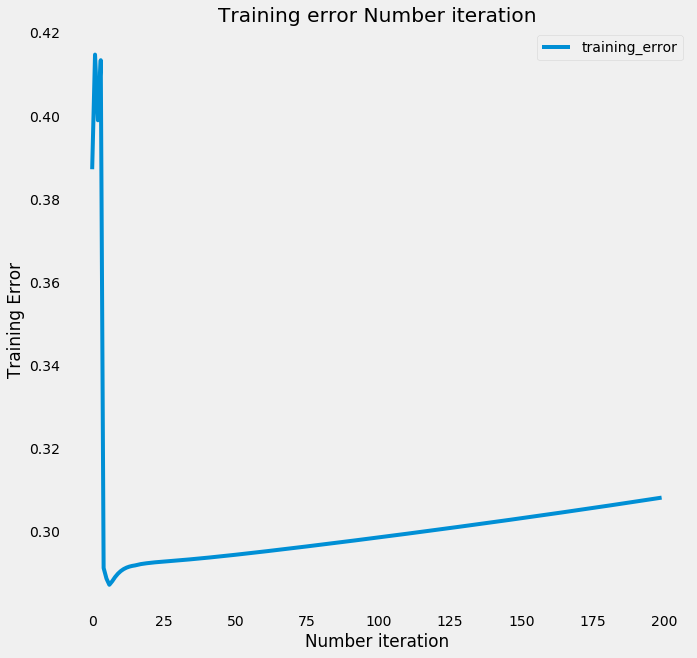

In [348]:
N = np.arange(len(training_error))
plot_figure(training_error, N, "training_error", "Training error Number iteration", 'Number iteration', 'Training Error')

#### CROSS VALIDATION

##### CROSS VALIDATION LAMDA 1

In [349]:
nb_neuronal_first_layer = 5
list_parameter_lamda_1 = [0.01, 10, 0.1, 1, 0.21, 5]
lamda_2 = 0.01
beta_1 = 0.01
beta_2 = 0.01
step_size = 1

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, False)

error_cross_validation_lamda_1_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_1)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])
        training_Y = data_Y_II[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])["bodyfat"]
    
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_adam_II(training_X, training_Y, list_parameter_lamda_1[i], lamda_2, step_size, nb_neuronal_first_layer, beta_1, beta_2, 100)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, list_parameter_lamda_1[i], lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_1_.append(np.mean(error_k_fold))

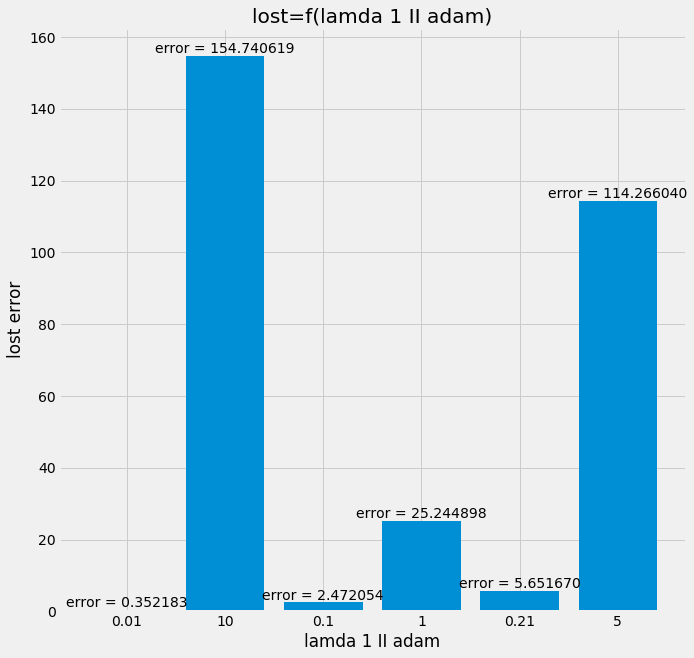

In [350]:
plot_hist(["0.01", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_1_, "lost=f(lamda 1 II adam)", "lamda 1 II adam", "lost error")

##### CROSS VALIDATION LAMDA 2

In [351]:
nb_neuronal_first_layer = 5
list_parameter_lamda_2 = [0.01, 10, 0.1, 1, 0.21, 5]
lamda_1 = 0.01
beta_1 = 0.01
beta_2 = 0.01
step_size = 1

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, False)

error_cross_validation_lamda_2_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_1)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])
        training_Y = data_Y_II[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])["bodyfat"]
    
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_adam_II(training_X, training_Y, lamda_1, list_parameter_lamda_2[i], step_size, nb_neuronal_first_layer, beta_1, beta_2, 100)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, list_parameter_lamda_2[i])
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_2_.append(np.mean(error_k_fold))

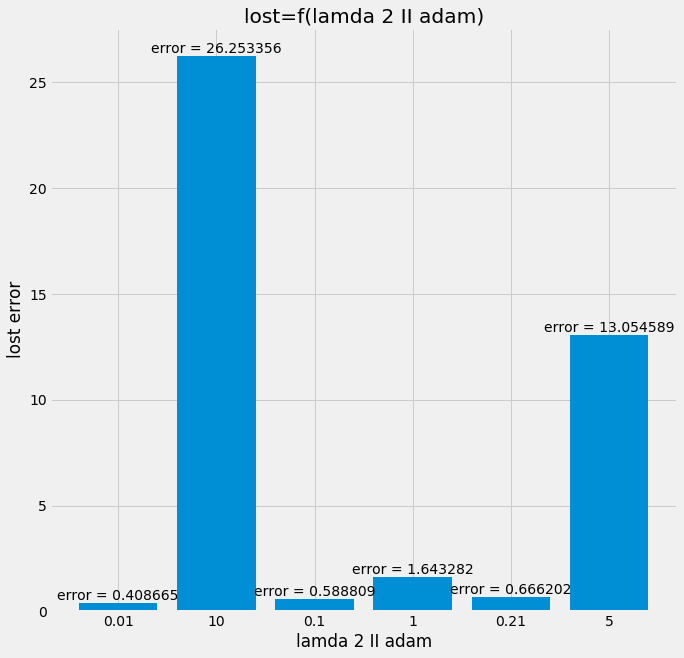

In [352]:
plot_hist(["0.01", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_2_, "lost=f(lamda 2 II adam)", "lamda 2 II adam", "lost error")

#### CROSS VALIDATION STEP SIZE

In [353]:
nb_neuronal_first_layer = 5
lamda_2 = 0.01
lamda_1 = 0.01
beta_1 = 0.01
beta_2 = 0.01
list_parameter_step_size = [0.1, 0.02, 0.3, 0.04, 0.5, 0.6, 1]

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, False)

error_cross_validation_step_size_II = list()
#error_k_fold = list()
for i in range(len(list_parameter_step_size)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])
        training_Y = data_Y_II[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])["bodyfat"]
    
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_adam_II(training_X, training_Y, lamda_2, lamda_2, list_parameter_step_size[i], nb_neuronal_first_layer, beta_1, beta_2, 30)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_step_size_II.append(np.mean(error_k_fold))

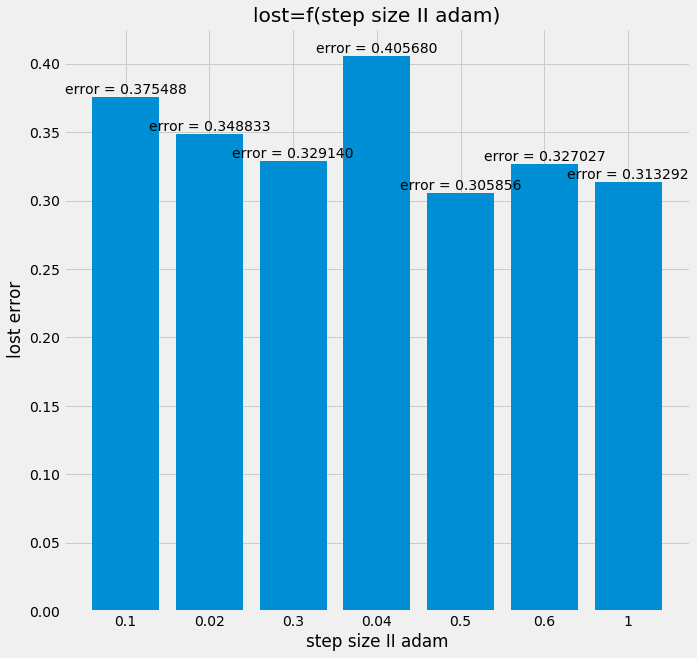

In [354]:
plot_hist(["0.1", "0.02", "0.3", "0.04", "0.5", "0.6", "1"], error_cross_validation_step_size_II, "lost=f(step size II adam)", "step size II adam", "lost error")

##### CROSS VALIDATION BETA 1

In [1583]:
nb_neuronal_first_layer = 5
lamda_2 = 0.01
lamda_1 = 0.01
beta_2 = 0.1
step_size = 1
list_beta_1 = [0.01, 0.0002, 0.03, 0.004, 0.005, 0.006]

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, False)

error_cross_validation_beta_1_II_ = list()
#error_k_fold = list()
for i in range(len(list_beta_1)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])
        training_Y = data_Y_II[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])["bodyfat"]
    
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_adam_II(training_X, training_Y, lamda_2, lamda_2, step_size, nb_neuronal_first_layer, list_beta_1[i], beta_2, 100)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_beta_1_II_.append(np.mean(error_k_fold))

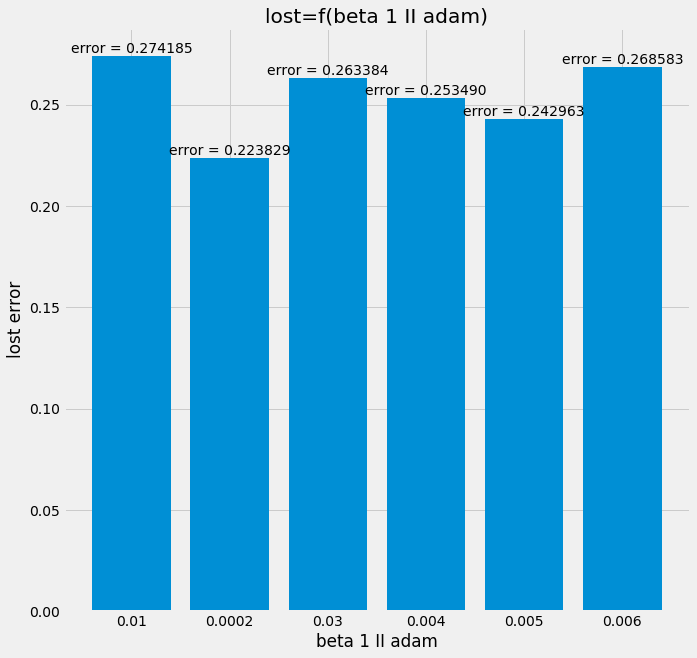

In [1584]:
plot_hist(["0.01", "0.0002", "0.03", "0.004", "0.005", "0.006"], error_cross_validation_beta_1_II_, "lost=f(beta 1 II adam)", "beta 1 II adam", "lost error")

##### CROSS VALIDATION BETA 2

In [1585]:
nb_neuronal_first_layer = 5
lamda_2 = 0.01
lamda_1 = 0.01
beta_1 = 0.1
step_size = 1
list_beta_2 = [0.01, 0.0002, 0.03, 0.004, 0.005, 0.006]

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, False)

error_cross_validation_beta_2_II_ = list()
#error_k_fold = list()
for i in range(len(list_beta_2)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])
        training_Y = data_Y_II[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])["bodyfat"]
    
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_adam_II(training_X, training_Y, lamda_2, lamda_2, step_size, nb_neuronal_first_layer, beta_1, list_beta_2[i], 100)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_beta_2_II_.append(np.mean(error_k_fold))

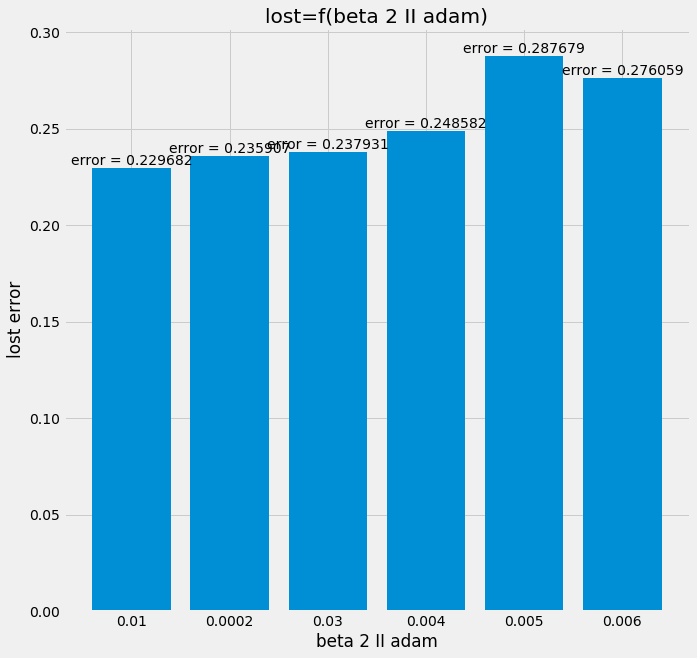

In [1586]:
plot_hist(["0.01", "0.0002", "0.03", "0.004", "0.005", "0.006"], error_cross_validation_beta_2_II_, "lost=f(beta 2 II adam)", "beta 2 II adam", "lost error")

## d) BCD

#### INITIALIZATION

In [432]:
# initialization
nb_neuronal_first_layer = 25

lamda_1 = 0.01
lamda_2 = 0.01
step_size = 0.001

#W_1 = np.ones((nb_neuronal_first_layer, data_X.shape[1]))
#W_2 = np.ones((1, nb_neuronal_first_layer))
W_1 = np.random.rand(nb_neuronal_first_layer, data_X.shape[1])
W_2 = np.random.rand(1,nb_neuronal_first_layer)

#### TRAINING ALGORITHM

In [442]:
def traning_BCD_II(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, nb_iteration):
    """we use this function for training the weights using mini bath sge """
    
    x = data_X.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data_X = pd.DataFrame(x_scaled)
    
    # initialize weight
    W_1 = 0.01*np.random.rand(data_X.shape[1], nb_neuronal_first_layer)
    W_2 = 0.01*np.random.rand(nb_neuronal_first_layer, 1)#0.1*np.ones((1, nb_output_first_layer))
    training_error = list()
    j = random.randint(0,data_X.shape[0])%data_X.shape[0]
    
    for i in range(nb_iteration):
        
        W_1_grad, W_2_grad_ = gradient_loss_g_i_II(pd.DataFrame(data_X.iloc[j]).T, data_Y[j], W_1, W_2, lamda_1, lamda_2)
        
        W_1_grad_, W_2_grad = gradient_loss_g_i_II(pd.DataFrame(data_X.iloc[j]).T, data_Y[j], W_1_grad, W_2_grad_, lamda_1, lamda_2)

        #print(np.linalg.norm(W_2_grad))
        loss_ = loss_function_f_II(data_X, data_Y, W_1_grad, W_2_grad, lamda_1, lamda_2)
        
        #print(loss_)
        training_error.append(loss_)
        
        W_1 = W_1 - step_size*W_1_grad
        W_2 = W_2 - step_size*W_2_grad
        
    return W_1, W_2, training_error
    

In [443]:
l1, l2, training_error = traning_BCD_II(data_X, data_Y_II, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, 1000)

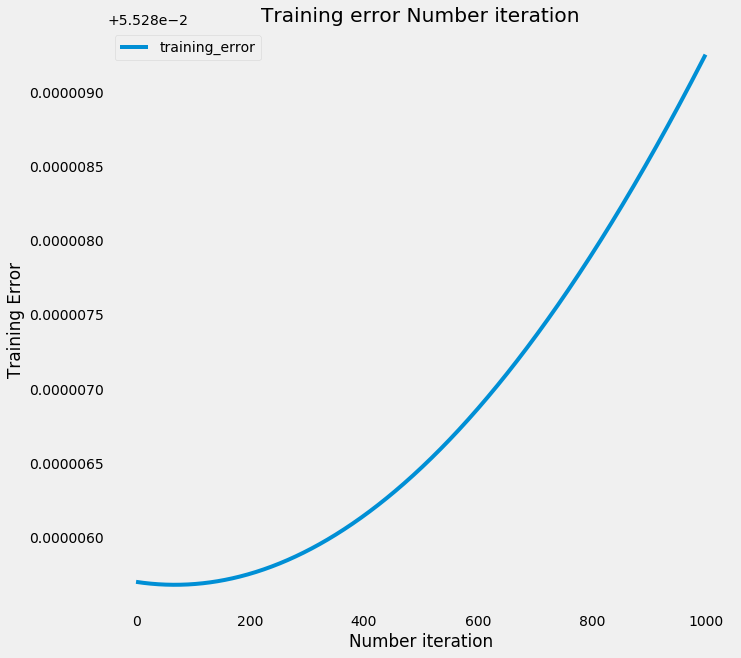

In [444]:
N = np.arange(len(training_error))
plot_figure(training_error, N, "training_error", "Training error Number iteration", 'Number iteration', 'Training Error')

#### CROSS VALIDATION

##### Cross Validation in fact Lamda 1

In [446]:
nb_neuronal_first_layer = 5
list_parameter_lamda_1 = [0.01, 10, 0.1, 1, 0.21, 5]
lamda_2 = 0.01
step_size = 0.01

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_1_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_1)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])
        training_Y = data_Y_II[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])["bodyfat"]
    
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_BCD_II(training_X, training_Y, list_parameter_lamda_1[i], lamda_2, step_size, nb_neuronal_first_layer, 1000)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, list_parameter_lamda_1[i], lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_1_.append(np.mean(error_k_fold))

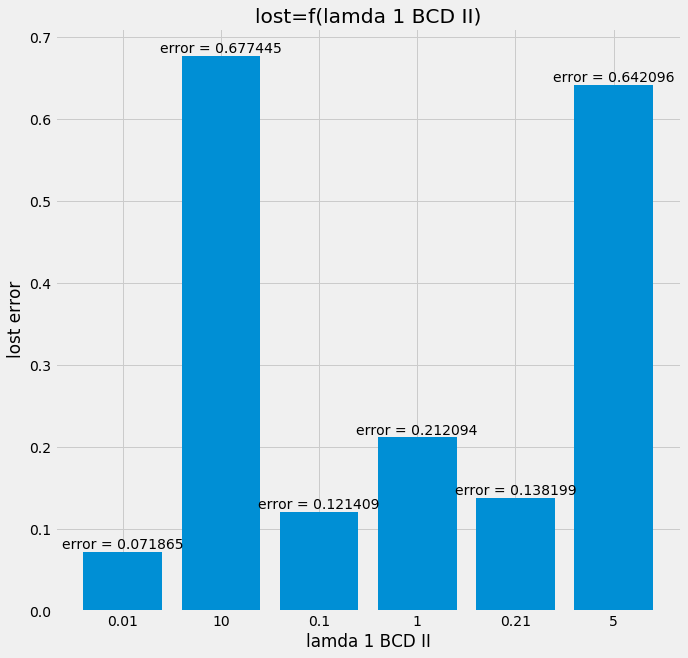

In [447]:
plot_hist(["0.01", "10", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_1_, "lost=f(lamda 1 BCD II)", "lamda 1 BCD II", "lost error")

##### Cross Validation in fact Lamda 2

In [451]:
nb_neuronal_first_layer = 10
lamda_1 = 0.01
list_parameter_lamda_2 = [0.01, 0.001, 0.1, 1, 0.21, 5]
step_size = 0.01

# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_lamda_2_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_lamda_2)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])
        training_Y = data_Y_II[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])["bodyfat"]
    
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_BCD_II(training_X, training_Y, lamda_1, list_parameter_lamda_2[i], step_size, nb_neuronal_first_layer, 1000)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, list_parameter_lamda_2[i])
        
        error_k_fold.append(tamp_1)
    error_cross_validation_lamda_2_.append(np.mean(error_k_fold))

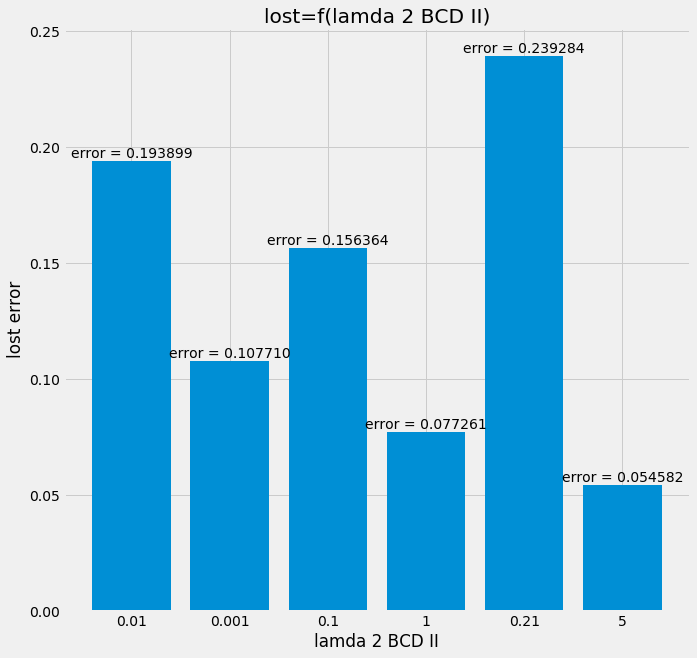

In [452]:
plot_hist(["0.01", "0.001", "0.1", "1", "0.21", "5"], error_cross_validation_lamda_2_, "lost=f(lamda 2 BCD II)", "lamda 2 BCD II", "lost error")

#### CROSS VALIDATION STEP SIZE

In [453]:
nb_neuronal_first_layer = 10
lamda_1 = 0.01
lamda_2 = 0.01
list_parameter_step_size = [0.01, 0.0002, 0.03, 0.004, 0.005, 0.006]


# size data
size_data = data_X.shape[0]

# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

error_cross_validation_step_size_ = list()
#error_k_fold = list()
for i in range(len(list_parameter_step_size)):
    error_k_fold = list()
    for k in range(nb_kfold):
        training_index = []
        for j in range(nb_kfold-1):
            training_index = np.concatenate((training_index, k_fold_index[(k+j)%nb_kfold]))
    
        training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])
        training_Y = data_Y_II[[x in training_index for x in  data_X.index.values.tolist()]].reset_index().drop(columns=['index'])["bodyfat"]
    
        testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
        testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T
        
        l1, l2, training_error = traning_BCD_II(training_X, training_Y, lamda_1, lamda_2, list_parameter_step_size[i], nb_neuronal_first_layer, 1000)
        tamp_1 = loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, lamda_2)
        
        error_k_fold.append(tamp_1)
    error_cross_validation_step_size_.append(np.mean(error_k_fold))

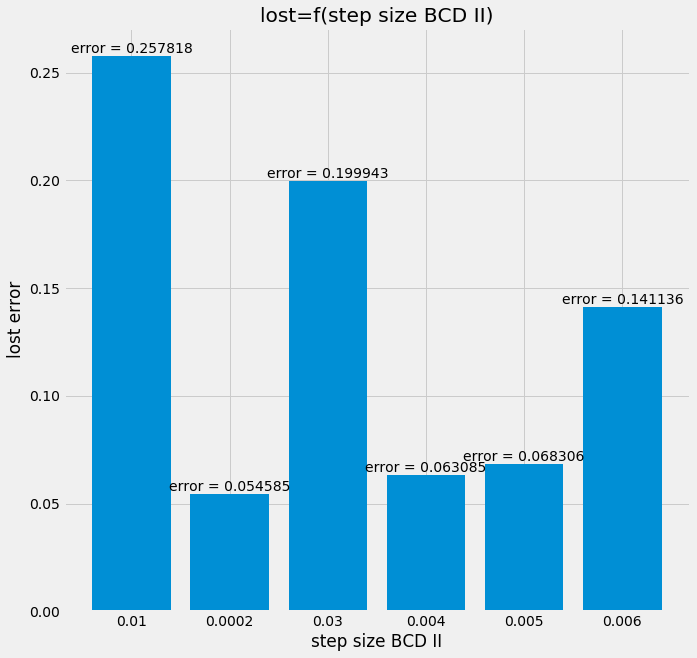

In [454]:
plot_hist(["0.01", "0.0002", "0.03", "0.004", "0.005", "0.006"], error_cross_validation_step_size_, "lost=f(step size BCD II)", "step size BCD II", "lost error")

## COMPARISON OF METHODS

In [455]:
# size data
size_data = data_X.shape[0]
nb_kfold = 4
# build different k fold 
k_fold_index = divide_data_set(list(np.arange(size_data)), nb_kfold, True)

training_index = []

for k in range(nb_kfold-1):
    training_index = np.concatenate((training_index, k_fold_index[k]))

training_X = data_X[[x in training_index for x in  data_X.index.values.tolist()]]
training_Y = data_Y_II.T[[x in training_index for x in  data_X.index.values.tolist()]].T
        
testing_X = data_X[[x not in training_index for x in  data_X.index.values.tolist()]]
testing_Y = data_Y_II.T[[x not in training_index for x in  data_X.index.values.tolist()]].T

In [456]:
Training_error = list()
Testing_error = list()

##### BP :

In [457]:
# initialization
nb_neuronal_first_layer = 10

lamda_1 = 0.01
lamda_2 = 0.01
step_size = 0.01


l1, l2, training_error = traning_BP_II(training_X, training_Y, lamda_1, lamda_2, 1, 5, 100)
training_error = np.mean(training_error)
testing_error = np.mean(loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, lamda_2))
Training_error.append(training_error)
Testing_error.append(testing_error)
BP_error = np.abs(training_error-testing_error)
mse_BP = np.sum((forward_deep_II(testing_X, l1, l2)-testing_Y)**2)/testing_X.shape[0]

##### SGD :

In [458]:
# initialization
nb_neuronal_first_layer = 10

lamda_1 = 0.01
lamda_2 = 0.01
size_batch = 30
step_size = 0.002

l1, l2, training_error = traning_mini_bath_SGD_II(data_X, data_Y_II, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, size_batch, 100)
training_error = np.mean(training_error)
testing_error = np.mean(loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, lamda_2))
Training_error.append(training_error)
Testing_error.append(testing_error)
BP_error = np.abs(training_error-testing_error)
mse_BP = np.sum((forward_deep_II(testing_X, l1, l2)-testing_Y)**2)/testing_X.shape[0]

##### ADAM

In [459]:
# initialization
nb_neuronal_first_layer = 5

lamda_1 = 0.01
lamda_2 = 0.01
beta_1 = 0.01
beta_2 = 0.01
step_size = 1


L1, L2, training_error = traning_adam_II(data_X, data_Y_II, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, beta_1, beta_2, 100)
training_error = np.mean(training_error)
testing_error = np.mean(loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, lamda_2))
Training_error.append(training_error)
Testing_error.append(testing_error)
BP_error = np.abs(training_error-testing_error)
mse_BP = np.sum((forward_deep_II(testing_X, l1, l2)-testing_Y)**2)/testing_X.shape[0]

##### BCD

In [460]:
# initialization
nb_neuronal_first_layer = 10

lamda_1 = 0.01
lamda_2 = 0.01
step_size = 0.01

#W_1 = np.ones((nb_neuronal_first_layer, data_X.shape[1]))
#W_2 = np.ones((1, nb_neuronal_first_layer))
W_1 = np.random.rand(nb_neuronal_first_layer, data_X.shape[1])
W_2 = np.random.rand(1,nb_neuronal_first_layer)

l1, l2, training_error = traning_BCD_II(data_X, data_Y, lamda_1, lamda_2, step_size, nb_neuronal_first_layer, 10000)
testing_error = np.mean(loss_function_f_II(testing_X, testing_Y, l1, l2, lamda_1, lamda_2))
Training_error.append(np.mean(training_error))
Testing_error.append(testing_error)
BP_error = np.abs(training_error-testing_error)
mse_BP = np.sum((forward_deep_II(testing_X, l1, l2)-testing_Y)**2)/testing_X.shape[0]

##### MSE HIST

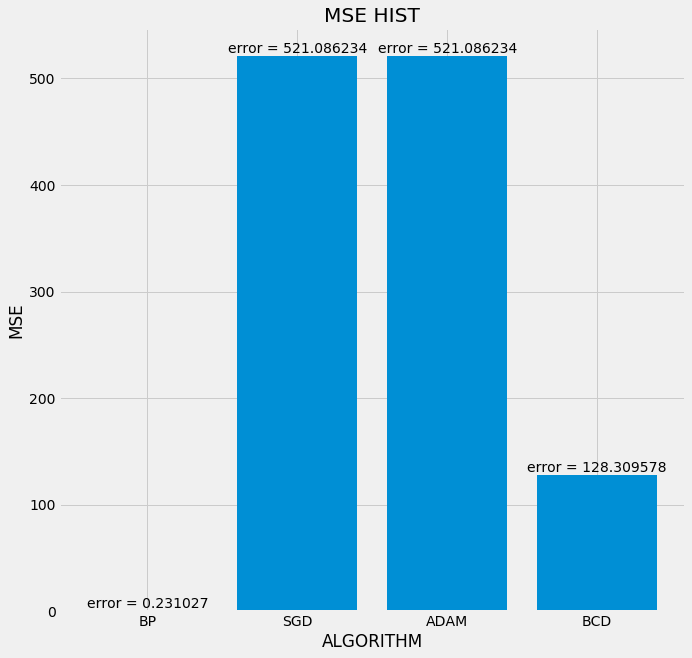

In [461]:
plot_hist(["BP", "SGD", "ADAM", "BCD"], [mse_BP, mse_MINI_SGD, mse_ADAM, mse_BCD], "MSE HIST", "ALGORITHM", "MSE")

##### ERROR TRAINING TESTING

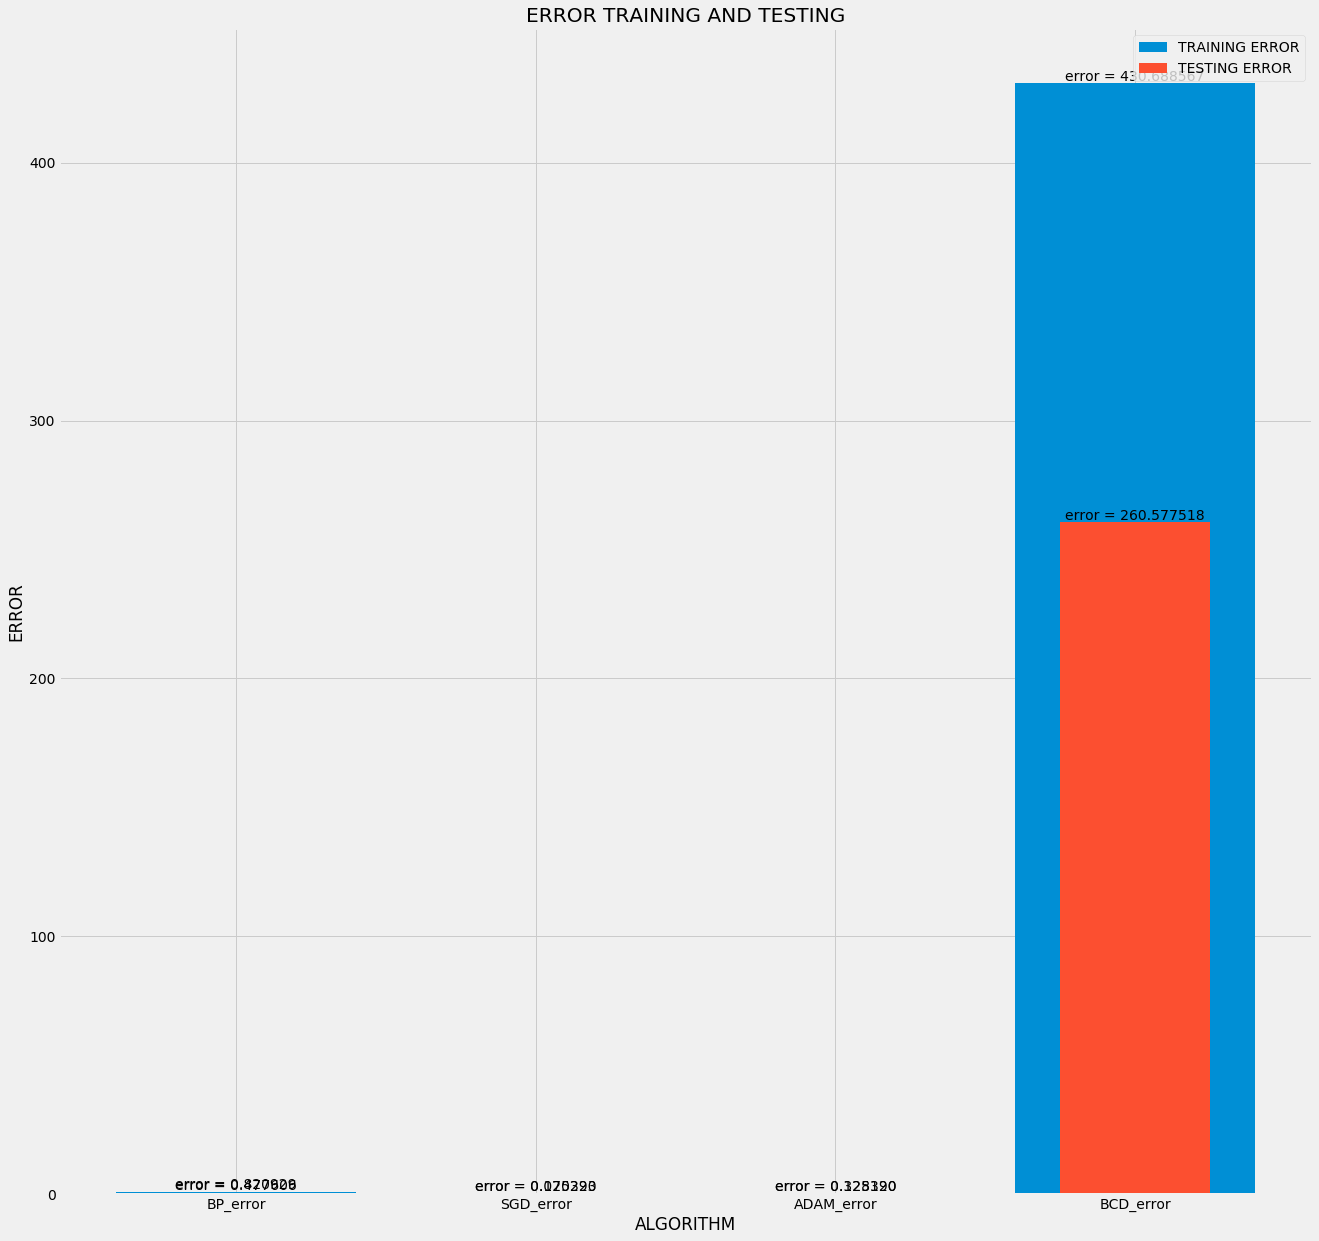

In [462]:
plt.style.use('fivethirtyeight')


plt.figure(figsize=(20,20))
width = 0.35 
unit = Training_error

k_value = ["BP_error", "SGD_error", "ADAM_error", "BCD_error"]
plot = plt.bar(k_value, Training_error, label = "TRAINING ERROR")
plot1 = plt.bar(k_value, Testing_error, width=0.5, label = "TESTING ERROR")
 
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2., height,'error = %f' % height, ha='center', va='bottom')
    
for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2., height,'error = %f' % height, ha='center', va='bottom')
 
plt.title("ERROR TRAINING AND TESTING")
plt.xlabel("ALGORITHM")
plt.ylabel("ERROR")

plt.savefig('training_testing_error.png')
plt.legend()
# show the graph
plt.show()